# Analysis Of Attrition Rate at the Company in the given dataset attrition

                                                                                                           By Anurag 

# 1.Working on data


In [ ]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Describe data
df = pd.read_csv("attrition.csv")
df

,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
0,41,1,Travel_Rarely,Sales,Life Sciences,2,Female,3,2,4,Single,5993,Yes,8,1,6,4,0,5,1
1,49,0,Travel_Frequently,Research & Development,Life Sciences,3,Male,2,2,2,Married,5130,No,10,3,10,7,1,7,8
2,37,1,Travel_Rarely,Research & Development,Other,4,Male,2,1,3,Single,2090,Yes,7,3,0,0,0,0,2
3,33,0,Travel_Frequently,Research & Development,Life Sciences,4,Female,3,1,3,Married,2909,Yes,8,3,8,7,3,0,3
4,27,0,Travel_Rarely,Research & Development,Medical,1,Male,3,1,2,Married,3468,No,6,3,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,Research & Development,Medical,3,Male,4,2,4,Married,2571,No,17,3,5,2,0,3,23
1466,39,0,Travel_Rarely,Research & Development,Medical,4,Male,2,3,1,Married,9991,No,9,3,7,7,1,7,6
1467,27,0,Travel_Rarely,Research & Development,Life Sciences,2,Male,4,2,2,Married,6142,Yes,6,3,6,2,0,3,4
1468,49,0,Travel_Frequently,Sales,Medical,4,Male,2,2,2,Married,5390,No,17,2,9,6,0,8,2


In [ ]:
plt.rcParams['axes.facecolor'] = 'Beige'

In [ ]:
df.tail()

,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
1465,36,0,Travel_Frequently,Research & Development,Medical,3,Male,4,2,4,Married,2571,No,17,3,5,2,0,3,23
1466,39,0,Travel_Rarely,Research & Development,Medical,4,Male,2,3,1,Married,9991,No,9,3,7,7,1,7,6
1467,27,0,Travel_Rarely,Research & Development,Life Sciences,2,Male,4,2,2,Married,6142,Yes,6,3,6,2,0,3,4
1468,49,0,Travel_Frequently,Sales,Medical,4,Male,2,2,2,Married,5390,No,17,2,9,6,0,8,2
1469,34,0,Travel_Rarely,Research & Development,Medical,2,Male,4,2,3,Married,4404,No,6,4,4,3,1,2,8


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.0,60.0
Attrition,1470.0,0.161224,0.367863,0.0,0.0,0.0,0.0,1.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.0,4.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.0,3.0,3.0,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.0,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.0,4.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
TotalWorkingYears,1470.0,11.279592,7.780782,0.0,6.0,10.0,15.0,40.0
WorkLifeBalance,1470.0,2.761224,0.706476,1.0,2.0,3.0,3.0,4.0
YearsAtCompany,1470.0,7.008163,6.126525,0.0,3.0,5.0,9.0,40.0


# 2.Getting all the column names in the data

In [ ]:
import csv

with open('attrition.csv') as csv_file:
  csv_reader = csv.reader(csv_file, delimiter = ',')
  
  list_header = []

  for col_name in csv_reader:
    list_header.append(col_name)
    break

print(list_header)






[['Age', 'Attrition', 'BusinessTravel', 'Department', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'OverTime', 'TotalWorkingYears', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'DistanceFromHome']]


# 3.Checking for attrition rates

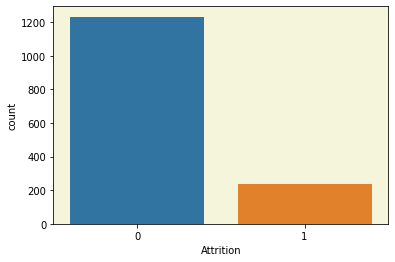

In [ ]:
sns.countplot(x = 'Attrition', data = df)
plt.show()

# 4.Counts of observations

### Male and female in company

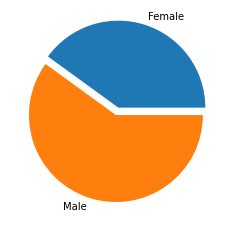

In [ ]:
group_gender = df.groupby("Gender").count().reset_index()
sizes = group_gender['Age']
# labels = group_gender['Gender']
# explode in pie chart is used to do spacing between the required datda
plt.pie(sizes, labels = group_gender["Gender"], explode = [0.09, 0])
plt.show()


### Relationship between marital status and attrition

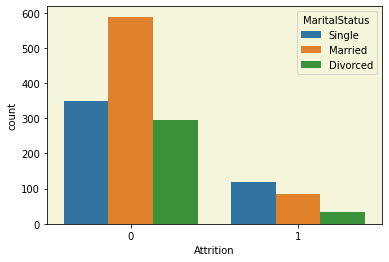

In [ ]:
sns.countplot(x='Attrition', hue = 'MaritalStatus', data = df)
plt.show()

### Relationship between BusinessTravel and attrition

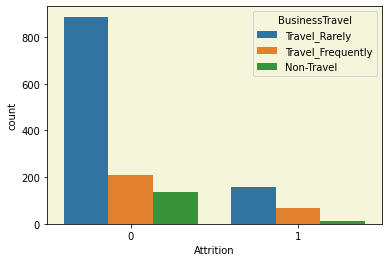

In [ ]:
sns.countplot(x='Attrition', hue = 'BusinessTravel', data = df)
plt.show()

# Relationship between Attrition and Department

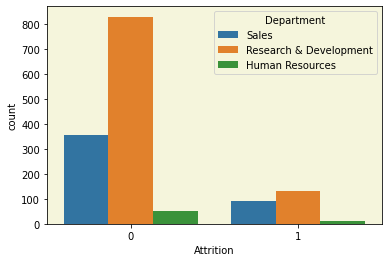

In [ ]:
sns.countplot(x='Attrition', hue='Department', data = df)
plt.show()

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
0,41,1,Travel_Rarely,Sales,Life Sciences,2,Female,3,2,4,Single,5993,Yes,8,1,6,4,0,5,1
1,49,0,Travel_Frequently,Research & Development,Life Sciences,3,Male,2,2,2,Married,5130,No,10,3,10,7,1,7,8
2,37,1,Travel_Rarely,Research & Development,Other,4,Male,2,1,3,Single,2090,Yes,7,3,0,0,0,0,2
3,33,0,Travel_Frequently,Research & Development,Life Sciences,4,Female,3,1,3,Married,2909,Yes,8,3,8,7,3,0,3
4,27,0,Travel_Rarely,Research & Development,Medical,1,Male,3,1,2,Married,3468,No,6,3,2,2,2,2,2


In [ ]:
cat = ['Age', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'DistanceFromHome']
for i in cat:
  print("\n------------------------------")
  print(df[i].describe())



------------------------------
count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

------------------------------
count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

------------------------------
count    1470.000000
mean       11.279592
std         7.780782
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: TotalWorkingYears, dtype: float64

------------------------------
count    1470.000000
mean        7.008163
std         6.126525
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        40.000000
Name: YearsAtCompany, dtype: float64

------------------------------
count    1470.000000


# 5.Correlation among variables

In [ ]:
corr = df.corr()
corr.style.background_gradient()

,Age,Attrition,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
Age,1.000000,-0.159205,0.010146,0.029820,0.509604,-0.004892,0.497855,0.680381,-0.021490,0.311309,0.212901,0.216513,0.202089,-0.001686
Attrition,-0.159205,1.000000,-0.103369,-0.130016,-0.169105,-0.103481,-0.159840,-0.171063,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199,0.077924
EnvironmentSatisfaction,0.010146,-0.103369,1.000000,-0.008278,0.001212,-0.006784,-0.006259,-0.002693,0.027627,0.001458,0.018007,0.016194,-0.004999,-0.016075
JobInvolvement,0.029820,-0.130016,-0.008278,1.000000,-0.012630,-0.021476,-0.015271,-0.005533,-0.014617,-0.021355,0.008717,-0.024184,0.025976,0.008783
JobLevel,0.509604,-0.169105,0.001212,-0.012630,1.000000,-0.001944,0.950300,0.782208,0.037818,0.534739,0.389447,0.353885,0.375281,0.005303
JobSatisfaction,-0.004892,-0.103481,-0.006784,-0.021476,-0.001944,1.000000,-0.007157,-0.020185,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656,-0.003669
MonthlyIncome,0.497855,-0.159840,-0.006259,-0.015271,0.950300,-0.007157,1.000000,0.772893,0.030683,0.514285,0.363818,0.344978,0.344079,-0.017014
TotalWorkingYears,0.680381,-0.171063,-0.002693,-0.005533,0.782208,-0.020185,0.772893,1.000000,0.001008,0.628133,0.460365,0.404858,0.459188,0.004628
WorkLifeBalance,-0.021490,-0.063939,0.027627,-0.014617,0.037818,-0.019459,0.030683,0.001008,1.000000,0.012089,0.049856,0.008941,0.002759,-0.026556
YearsAtCompany,0.311309,-0.134392,0.001458,-0.021355,0.534739,-0.003803,0.514285,0.628133,0.012089,1.000000,0.758754,0.618409,0.769212,0.009508


# 6.Univariate Analysis

    In the given attrition dataset there are 20 columns.
    In this, one column is attrition column and rest 19 shows us the factor that shows attrition.

    Age - This column shows the age of employee. We can see how many employee are divided according to age groups.
    Attrition - This column shows employee left company or not. If its 1 employee left the company. If its 0 then employee didn't left the company.
    BusinessTravel -  There are 3 data in this column ie Travel_Frequently ie 277, Travel_Rarely ie 1043, Non-Travel are 150 this show how employee travel frequently, rarely or not travel.
    Department - Employee working in different department sales, research and development and sales.
    EducationField - There are 6 education field in this column. This shows employee came from which background to this company.
    EnvironmentSatisfaction - This shows how employee is satisfied with the working enviornment on a scale of 1 to 4.	
    Gender - This column represents the gender of employee.	
    JobInvolvement - Jobinvolvement is about how much the employee is involve in the company's meeting , assignment and project work etc. 
    JobLevel - This is the level of employee in company.
    JobSatisfaction	- This shows how much is the employee satisfied with the job.
    MaritalStatus	- Marital status is about employee whether he or she is married or single or divorced.
    MonthlyIncome	- This column shows the monthly income of the employee.
    OverTime	- Whether the employee is doing overtime or not.
    TotalWorkingYears	- How many years employee is working in companies.
    WorkLifeBalance	- Employee is able to manage his work life balance on scale of 1 to 4.
    YearsAtCompany - It tells from how many years is working that company.
    YearsInCurrentRole - From how many years the employee is in same current role.
    YearsSinceLastPromotion- Employee's year since lasr promotion.
    YearsWithCurrManager - Employee working years with the current manager.
    DistanceFromHome - How far the employee is staying away from company 




# 7.Bivariate Analysis

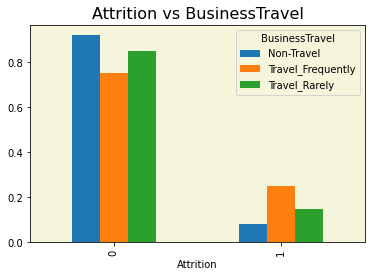

BusinessTravel  Non-Travel  Travel_Frequently  Travel_Rarely
Attrition                                                   
0                     0.92           0.750903       0.850431
1                     0.08           0.249097       0.149569


In [ ]:
cond1 = pd.crosstab(df.Attrition, columns =df["BusinessTravel"])
col1= cond1.sum(axis=0)
cd1 = cond1.div(col1,axis = 1)
cd1.plot.bar()
plt.title("Attrition vs BusinessTravel", fontsize = 16)
plt.show()
print(cd1)

### Bivariate Analysis for continuous data



--------------------------------------------------


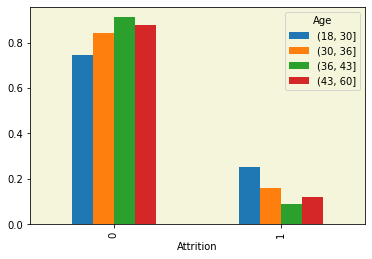

Age        (18, 30]  (30, 36]  (36, 43]  (43, 60]
Attrition                                        
0          0.746032  0.839806  0.910769  0.878963
1          0.253968  0.160194  0.089231  0.121037
--------------------------------------------------


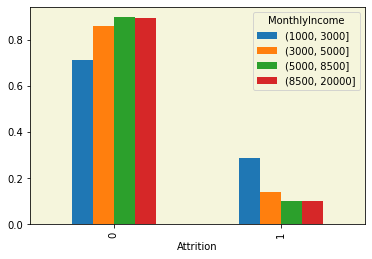

MonthlyIncome  (1000, 3000]  (3000, 5000]  (5000, 8500]  (8500, 20000]
Attrition                                                             
0                  0.713924      0.858757       0.89779       0.896936
1                  0.286076      0.141243       0.10221       0.103064
--------------------------------------------------


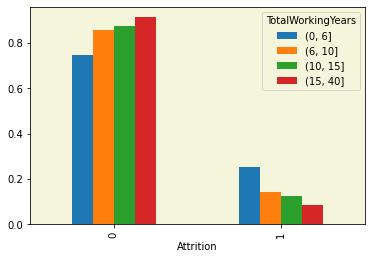

TotalWorkingYears    (0, 6]   (6, 10]  (10, 15]  (15, 40]
Attrition                                                
0                  0.748837  0.856846  0.874346  0.912921
1                  0.251163  0.143154  0.125654  0.087079
--------------------------------------------------


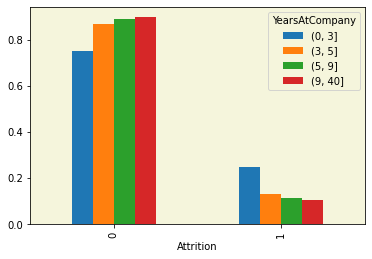

YearsAtCompany    (0, 3]    (3, 5]    (5, 9]   (9, 40]
Attrition                                             
0               0.751174  0.869281  0.887195  0.896175
1               0.248826  0.130719  0.112805  0.103825
--------------------------------------------------


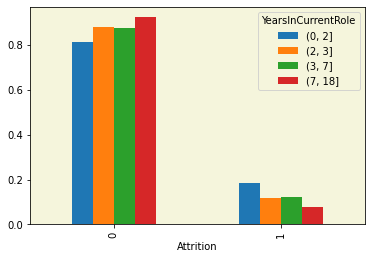

YearsInCurrentRole    (0, 2]    (2, 3]    (3, 7]   (7, 18]
Attrition                                                 
0                   0.815851  0.881481  0.877193  0.923954
1                   0.184149  0.118519  0.122807  0.076046
--------------------------------------------------


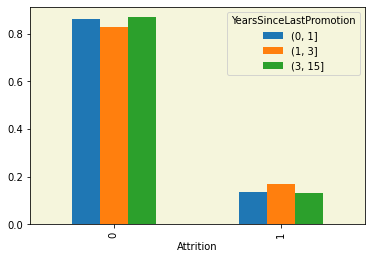

YearsSinceLastPromotion    (0, 1]    (1, 3]   (3, 15]
Attrition                                            
0                        0.862745  0.829384  0.869159
1                        0.137255  0.170616  0.130841
--------------------------------------------------


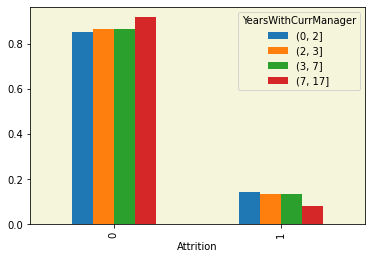

YearsWithCurrManager    (0, 2]    (2, 3]   (3, 7]   (7, 17]
Attrition                                                  
0                     0.854762  0.866197  0.86631  0.918819
1                     0.145238  0.133803  0.13369  0.081181
--------------------------------------------------


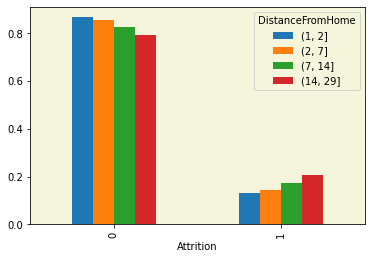

DistanceFromHome    (1, 2]    (2, 7]   (7, 14]  (14, 29]
Attrition                                               
0                 0.867299  0.856742  0.826471  0.794366
1                 0.132701  0.143258  0.173529  0.205634


In [ ]:
new_Age = pd.cut(df["Age"],bins=[18,30,36,43,60] )
new_MonthlyIncome = pd.cut(df["MonthlyIncome"],bins=[1000,3000,5000,8500,20000] )
new_TotalWorkingYear = pd.cut(df["TotalWorkingYears"],bins=[0,6,10,15,40] )
new_YearsAtCompany = pd.cut(df["YearsAtCompany"],bins=[0,3,5,9,40] )
new_YearsInCurrentRole = pd.cut(df["YearsInCurrentRole"],bins=[0,2,3,7,18] )
new_YearsSinceLastPromotion = pd.cut(df["YearsSinceLastPromotion"],bins=[0,1,3,15] )
new_YearsWithCurrManager = pd.cut(df["YearsWithCurrManager"],bins=[0,2,3,7,17] )
new_DistanceFromHome = pd.cut(df["DistanceFromHome"],bins=[1,2,7,14,29] )


list_cont = [new_Age,
            new_MonthlyIncome,
            new_TotalWorkingYear,
            new_YearsAtCompany,
            new_YearsInCurrentRole,
            new_YearsSinceLastPromotion,
            new_YearsWithCurrManager,
            new_DistanceFromHome]


for i_cont in list_cont:
    condition = pd.crosstab(df.Attrition, columns= i_cont)
    col_1 = condition.sum(axis=0)
    col_2 = condition.div(col_1, axis = 1)
    col_2.plot.bar()
    print("--------------------------------------------------")
    plt.show()
    print(col_2)


### Bivariate Analysis discrete data


---Attrition vs BusinessTravel -------------------------------------------------------------------------


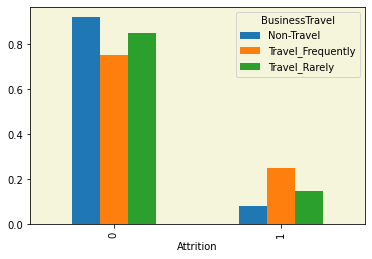

BusinessTravel  Non-Travel  Travel_Frequently  Travel_Rarely
Attrition                                                   
0                     0.92           0.750903       0.850431
1                     0.08           0.249097       0.149569

---Attrition vs Department -------------------------------------------------------------------------


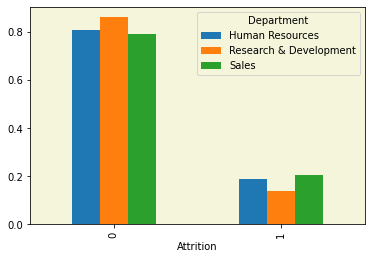

Department  Human Resources  Research & Development     Sales
Attrition                                                    
0                  0.809524                0.861602  0.793722
1                  0.190476                0.138398  0.206278

---Attrition vs EducationField -------------------------------------------------------------------------


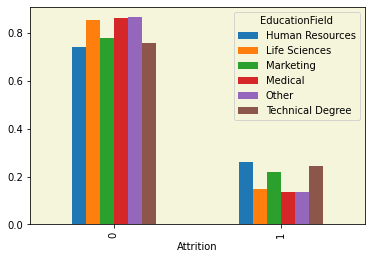

EducationField  Human Resources  Life Sciences  Marketing   Medical     Other  \
Attrition                                                                       
0                      0.740741       0.853135   0.779874  0.864224  0.865854   
1                      0.259259       0.146865   0.220126  0.135776  0.134146   

EducationField  Technical Degree  
Attrition                         
0                       0.757576  
1                       0.242424  

---Attrition vs EnvironmentSatisfaction -------------------------------------------------------------------------


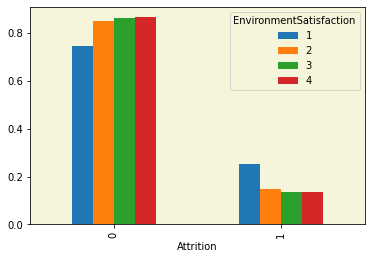

EnvironmentSatisfaction         1         2         3         4
Attrition                                                      
0                        0.746479  0.850174  0.863135  0.865471
1                        0.253521  0.149826  0.136865  0.134529

---Attrition vs Gender -------------------------------------------------------------------------


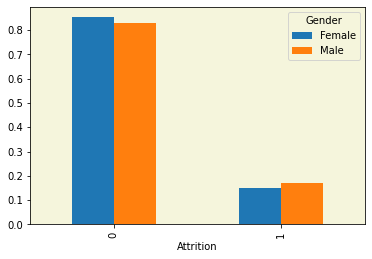

Gender       Female      Male
Attrition                    
0          0.852041  0.829932
1          0.147959  0.170068

---Attrition vs JobInvolvement -------------------------------------------------------------------------


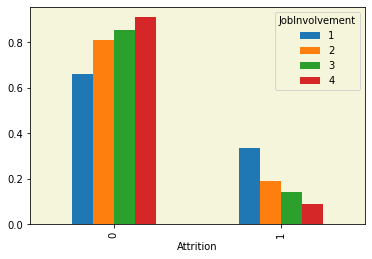

JobInvolvement         1         2         3         4
Attrition                                             
0               0.662651  0.810667  0.855991  0.909722
1               0.337349  0.189333  0.144009  0.090278

---Attrition vs JobLevel -------------------------------------------------------------------------


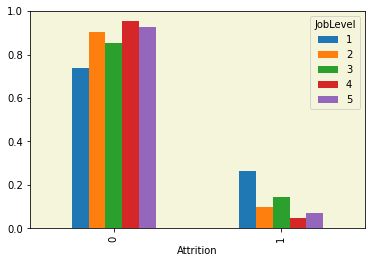

JobLevel          1         2         3        4         5
Attrition                                                 
0          0.736648  0.902622  0.853211  0.95283  0.927536
1          0.263352  0.097378  0.146789  0.04717  0.072464

---Attrition vs JobSatisfaction -------------------------------------------------------------------------


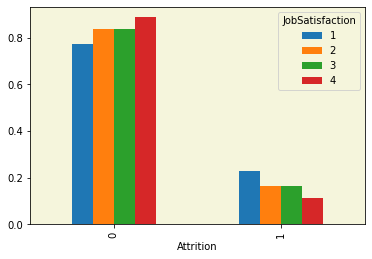

JobSatisfaction         1         2         3        4
Attrition                                             
0                0.771626  0.835714  0.834842  0.88671
1                0.228374  0.164286  0.165158  0.11329

---Attrition vs MaritalStatus -------------------------------------------------------------------------


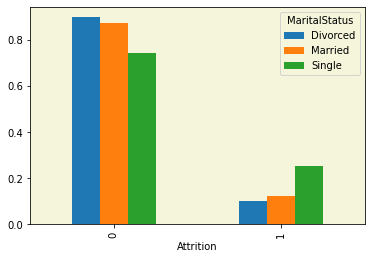

MaritalStatus  Divorced   Married    Single
Attrition                                  
0              0.899083  0.875186  0.744681
1              0.100917  0.124814  0.255319

---Attrition vs OverTime -------------------------------------------------------------------------


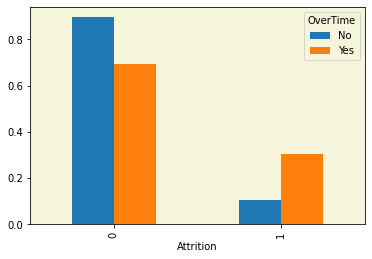

OverTime         No       Yes
Attrition                    
0          0.895636  0.694712
1          0.104364  0.305288

---Attrition vs WorkLifeBalance -------------------------------------------------------------------------


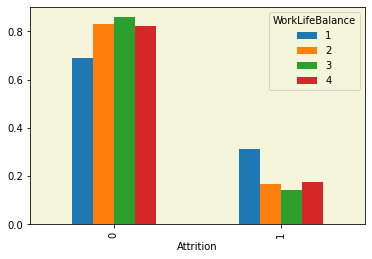

WorkLifeBalance       1         2         3         4
Attrition                                            
0                0.6875  0.831395  0.857783  0.823529
1                0.3125  0.168605  0.142217  0.176471


In [ ]:
li = ['BusinessTravel', 'Department', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MaritalStatus', 'OverTime',  'WorkLifeBalance']

for i in li:
        cond = pd.crosstab(df.Attrition, columns = df[i])
        col = cond.sum(axis = 0)
        cd = cond.div(col,axis = 1)
        print("\n---Attrition vs",i,"-------------------------------------------------------------------------")
        cd.plot.bar()

        plt.show()
        print(cd)

 # 8.Trivariate Analysis

### Trivariate Analysis for discrete data



1 >--------------------------Attrition vs BusinessTravel vs Department ------------


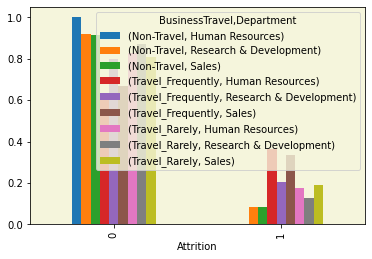

BusinessTravel      Non-Travel                                   \
Department     Human Resources Research & Development     Sales   
Attrition                                                         
0                          1.0               0.917526  0.914894   
1                          0.0               0.082474  0.085106   

BusinessTravel Travel_Frequently                                   \
Department       Human Resources Research & Development     Sales   
Attrition                                                           
0                       0.636364               0.796703  0.666667   
1                       0.363636               0.203297  0.333333   

BusinessTravel   Travel_Rarely                                   
Department     Human Resources Research & Development     Sales  
Attrition                                                        
0                     0.826087               0.870968  0.809524  
1                     0.173913               0.129032 

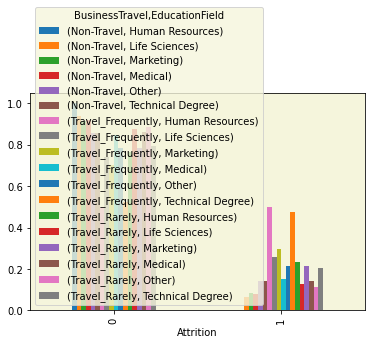

BusinessTravel      Non-Travel                                            \
EducationField Human Resources Life Sciences Marketing Medical     Other   
Attrition                                                                  
0                          1.0      0.936508  0.916667    0.92  0.857143   
1                          0.0      0.063492  0.083333    0.08  0.142857   

BusinessTravel                  Travel_Frequently                          \
EducationField Technical Degree   Human Resources Life Sciences Marketing   
Attrition                                                                   
0                      0.857143               0.5      0.739837  0.703704   
1                      0.142857               0.5      0.260163  0.296296   

BusinessTravel                                        Travel_Rarely  \
EducationField   Medical     Other Technical Degree Human Resources   
Attrition                                                             
0               0.84

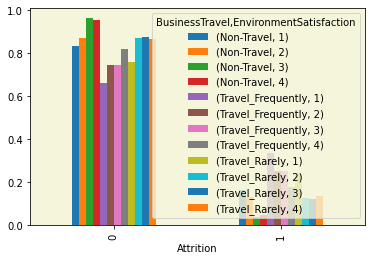

BusinessTravel          Non-Travel                                \
EnvironmentSatisfaction          1         2         3         4   
Attrition                                                          
0                         0.833333  0.869565  0.962963  0.953488   
1                         0.166667  0.130435  0.037037  0.046512   

BusinessTravel          Travel_Frequently                                \
EnvironmentSatisfaction                 1         2         3         4   
Attrition                                                                 
0                                0.661017  0.745098  0.746988  0.821429   
1                                0.338983  0.254902  0.253012  0.178571   

BusinessTravel          Travel_Rarely                                
EnvironmentSatisfaction             1         2         3         4  
Attrition                                                            
0                            0.758974  0.873239  0.876582  0.865204  
1  

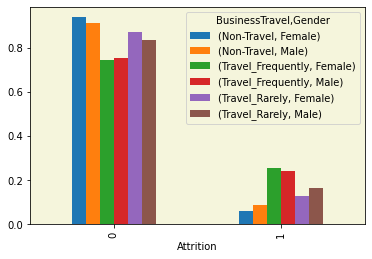

BusinessTravel Non-Travel           Travel_Frequently          Travel_Rarely  \
Gender             Female      Male            Female     Male        Female   
Attrition                                                                      
0                0.938776  0.910891           0.74359  0.75625      0.872038   
1                0.061224  0.089109           0.25641  0.24375      0.127962   

BusinessTravel            
Gender              Male  
Attrition                 
0               0.835749  
1               0.164251  


5 >--------------------------Attrition vs BusinessTravel vs JobInvolvement ------------


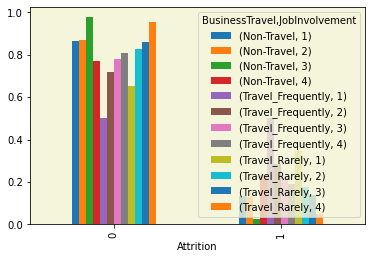

BusinessTravel Non-Travel                              Travel_Frequently  \
JobInvolvement          1         2        3         4                 1   
Attrition                                                                  
0                0.866667  0.868421  0.97619  0.769231               0.5   
1                0.133333  0.131579  0.02381  0.230769               0.5   

BusinessTravel                               Travel_Rarely                     \
JobInvolvement         2         3         4             1         2        3   
Attrition                                                                       
0               0.716418  0.779762  0.807692      0.653846  0.825926  0.86039   
1               0.283582  0.220238  0.192308      0.346154  0.174074  0.13961   

BusinessTravel            
JobInvolvement         4  
Attrition                 
0               0.952381  
1               0.047619  


6 >--------------------------Attrition vs BusinessTravel vs JobLevel -------

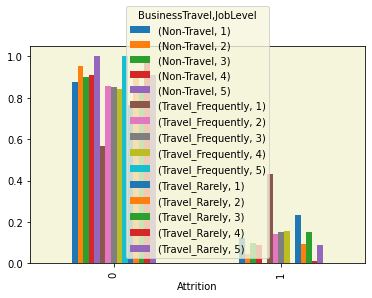

BusinessTravel Non-Travel                               Travel_Frequently  \
JobLevel                1         2    3         4    5                 1   
Attrition                                                                   
0                   0.875  0.955224  0.9  0.909091  1.0          0.567308   
1                   0.125  0.044776  0.1  0.090909  0.0          0.432692   

BusinessTravel                                Travel_Rarely            \
JobLevel               2     3         4    5             1         2   
Attrition                                                               
0               0.855769  0.85  0.842105  1.0      0.764706  0.906336   
1               0.144231  0.15  0.157895  0.0      0.235294  0.093664   

BusinessTravel                                
JobLevel               3         4         5  
Attrition                                     
0               0.848101  0.986842  0.909091  
1               0.151899  0.013158  0.090909  


7 >--------

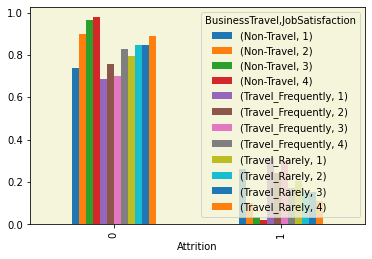

BusinessTravel  Non-Travel                               Travel_Frequently  \
JobSatisfaction          1         2         3         4                 1   
Attrition                                                                    
0                  0.73913  0.896552  0.962963  0.977273          0.686275   
1                  0.26087  0.103448  0.037037  0.022727          0.313725   

BusinessTravel                                Travel_Rarely            \
JobSatisfaction         2         3         4             1         2   
Attrition                                                               
0                0.755102  0.702381  0.827957      0.795349  0.846535   
1                0.244898  0.297619  0.172043      0.204651  0.153465   

BusinessTravel                       
JobSatisfaction         3         4  
Attrition                            
0                0.848684  0.891304  
1                0.151316  0.108696  


8 >--------------------------Attrition vs BusinessT

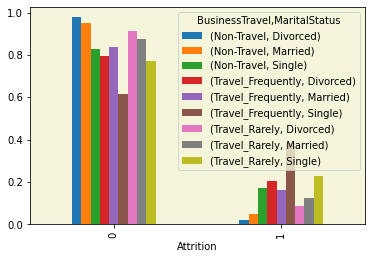

BusinessTravel Non-Travel                     Travel_Frequently            \
MaritalStatus    Divorced   Married    Single          Divorced   Married   
Attrition                                                                   
0                0.977273  0.949153  0.829787          0.793651  0.838983   
1                0.022727  0.050847  0.170213          0.206349  0.161017   

BusinessTravel           Travel_Rarely                    
MaritalStatus     Single      Divorced Married    Single  
Attrition                                                 
0               0.614583      0.913636   0.875  0.770642  
1               0.385417      0.086364   0.125  0.229358  


9 >--------------------------Attrition vs BusinessTravel vs OverTime ------------


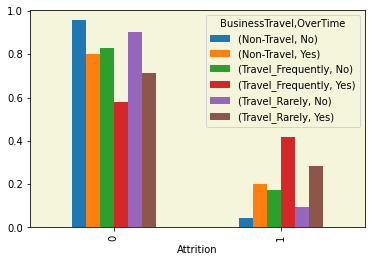

BusinessTravel Non-Travel      Travel_Frequently           Travel_Rarely  \
OverTime               No  Yes                No       Yes            No   
Attrition                                                                  
0                0.956522  0.8          0.827225  0.581395      0.903743   
1                0.043478  0.2          0.172775  0.418605      0.096257   

BusinessTravel            
OverTime             Yes  
Attrition                 
0               0.715254  
1               0.284746  


10 >--------------------------Attrition vs BusinessTravel vs WorkLifeBalance ------------


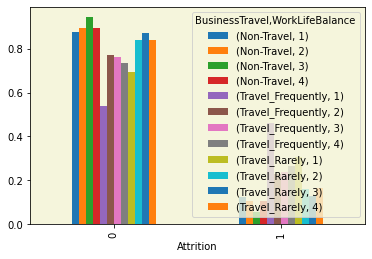

BusinessTravel  Non-Travel                              Travel_Frequently  \
WorkLifeBalance          1         2        3         4                 1   
Attrition                                                                   
0                    0.875  0.891892  0.94186  0.894737          0.538462   
1                    0.125  0.108108  0.05814  0.105263          0.461538   

BusinessTravel                                Travel_Rarely            \
WorkLifeBalance         2         3         4             1         2   
Attrition                                                               
0                0.772727  0.761905  0.733333      0.694915  0.838174   
1                0.227273  0.238095  0.266667      0.305085  0.161826   

BusinessTravel                       
WorkLifeBalance         3         4  
Attrition                            
0                0.871674  0.836538  
1                0.128326  0.163462  


11 >--------------------------Attrition vs Department vs

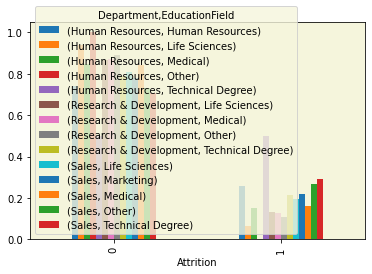

Department     Human Resources                                                 \
EducationField Human Resources Life Sciences   Medical Other Technical Degree   
Attrition                                                                       
0                     0.740741        0.9375  0.846154   1.0              0.5   
1                     0.259259        0.0625  0.153846   0.0              0.5   

Department     Research & Development                                       \
EducationField          Life Sciences   Medical     Other Technical Degree   
Attrition                                                                    
0                            0.865909  0.870523  0.890625         0.787234   
1                            0.134091  0.129477  0.109375         0.212766   

Department             Sales                                                 
EducationField Life Sciences Marketing   Medical     Other Technical Degree  
Attrition                                      

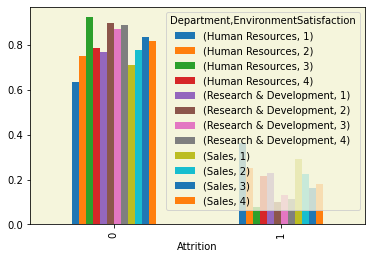

Department              Human Resources                            \
EnvironmentSatisfaction               1     2         3         4   
Attrition                                                           
0                              0.636364  0.75  0.923077  0.785714   
1                              0.363636  0.25  0.076923  0.214286   

Department              Research & Development                                \
EnvironmentSatisfaction                      1         2         3         4   
Attrition                                                                      
0                                     0.770053  0.898305  0.869863  0.888525   
1                                     0.229947  0.101695  0.130137  0.111475   

Department                  Sales                               
EnvironmentSatisfaction         1        2         3         4  
Attrition                                                       
0                        0.709302  0.77551  0.837037  0.81

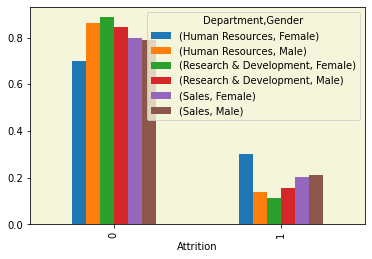

Department Human Resources           Research & Development            \
Gender              Female      Male                 Female      Male   
Attrition                                                               
0                      0.7  0.860465               0.886544  0.845361   
1                      0.3  0.139535               0.113456  0.154639   

Department     Sales            
Gender        Female      Male  
Attrition                       
0           0.798942  0.789883  
1           0.201058  0.210117  


14 >--------------------------Attrition vs Department vs JobInvolvement ------------


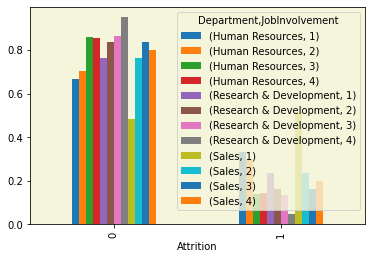

Department     Human Resources                                \
JobInvolvement               1         2         3         4   
Attrition                                                      
0                     0.666667  0.705882  0.861111  0.857143   
1                     0.333333  0.294118  0.138889  0.142857   

Department     Research & Development                                 Sales  \
JobInvolvement                      1        2         3        4         1   
Attrition                                                                     
0                            0.764706  0.83871  0.864286  0.95098  0.482759   
1                            0.235294  0.16129  0.135714  0.04902  0.517241   

Department                               
JobInvolvement         2         3    4  
Attrition                                
0               0.763636  0.838235  0.8  
1               0.236364  0.161765  0.2  


15 >--------------------------Attrition vs Department vs JobLevel -----

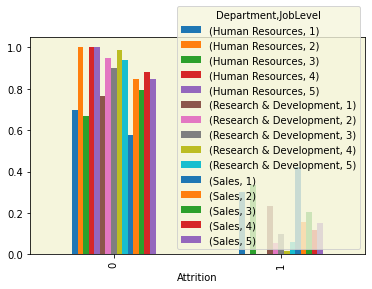

Department Human Resources                          Research & Development  \
JobLevel                 1    2         3    4    5                      1   
Attrition                                                                    
0                  0.69697  1.0  0.666667  1.0  1.0               0.767281   
1                  0.30303  0.0  0.333333  0.0  0.0               0.232719   

Department                                             Sales            \
JobLevel           2         3         4         5         1         2   
Attrition                                                                
0           0.946619  0.899225  0.985294  0.938776  0.578947  0.845833   
1           0.053381  0.100775  0.014706  0.061224  0.421053  0.154167   

Department                                
JobLevel           3         4         5  
Attrition                                 
0           0.795181  0.882353  0.846154  
1           0.204819  0.117647  0.153846  


16 >-----------------

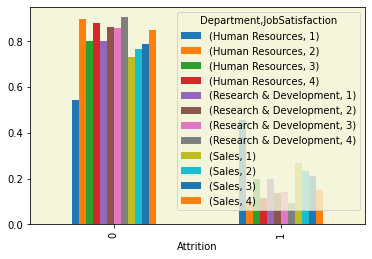

Department      Human Resources                     Research & Development  \
JobSatisfaction               1    2    3         4                      1   
Attrition                                                                    
0                      0.545455  0.9  0.8  0.882353               0.802083   
1                      0.454545  0.1  0.2  0.117647               0.197917   

Department                                        Sales                      \
JobSatisfaction         2         3         4         1         2         3   
Attrition                                                                     
0                0.862069  0.856667  0.905085  0.732558  0.767442  0.787402   
1                0.137931  0.143333  0.094915  0.267442  0.232558  0.212598   

Department                
JobSatisfaction        4  
Attrition                 
0                0.85034  
1                0.14966  


17 >--------------------------Attrition vs Department vs MaritalStatus -----

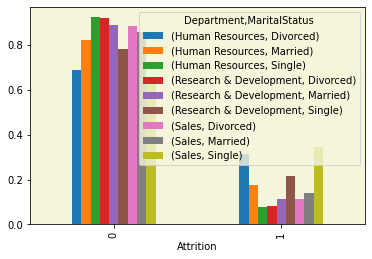

Department    Human Resources                     Research & Development  \
MaritalStatus        Divorced   Married    Single               Divorced   
Attrition                                                                  
0                      0.6875  0.823529  0.923077               0.919643   
1                      0.3125  0.176471  0.076923               0.080357   

Department                            Sales                      
MaritalStatus   Married    Single  Divorced   Married    Single  
Attrition                                                        
0              0.886836  0.782895  0.885057  0.859223  0.653595  
1              0.113164  0.217105  0.114943  0.140777  0.346405  


18 >--------------------------Attrition vs Department vs OverTime ------------


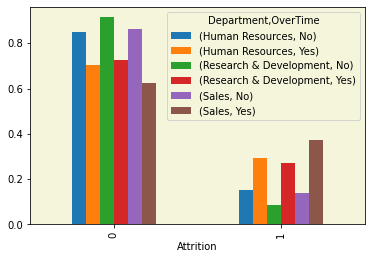

Department Human Resources           Research & Development            \
OverTime                No       Yes                     No       Yes   
Attrition                                                               
0                 0.847826  0.705882               0.914493  0.726937   
1                 0.152174  0.294118               0.085507  0.273063   

Department     Sales         
OverTime          No    Yes  
Attrition                    
0           0.861635  0.625  
1           0.138365  0.375  


19 >--------------------------Attrition vs Department vs WorkLifeBalance ------------


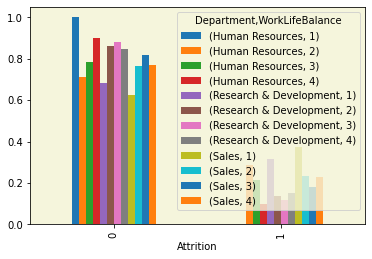

Department      Human Resources                           \
WorkLifeBalance               1         2         3    4   
Attrition                                                  
0                           1.0  0.714286  0.785714  0.9   
1                           0.0  0.285714  0.214286  0.1   

Department      Research & Development                               Sales  \
WorkLifeBalance                      1        2         3         4      1   
Attrition                                                                    
0                             0.683333  0.86383  0.881739  0.846154  0.625   
1                             0.316667  0.13617  0.118261  0.153846  0.375   

Department                                     
WorkLifeBalance         2         3         4  
Attrition                                      
0                0.764706  0.818841  0.769231  
1                0.235294  0.181159  0.230769  


20 >--------------------------Attrition vs EducationField vs Envir

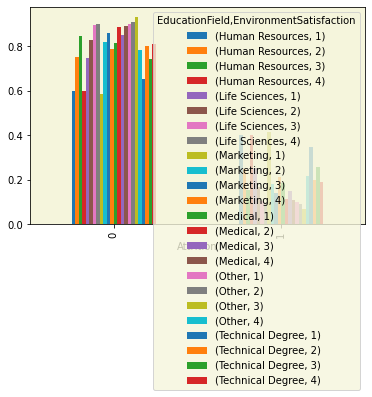

EducationField          Human Resources                      Life Sciences  \
EnvironmentSatisfaction               1     2         3    4             1   
Attrition                                                                    
0                                   0.6  0.75  0.846154  0.6      0.746154   
1                                   0.4  0.25  0.153846  0.4      0.253846   

EducationField                                        Marketing            \
EnvironmentSatisfaction         2         3         4         1         2   
Attrition                                                                   
0                        0.830357  0.894444  0.902174  0.586207  0.818182   
1                        0.169643  0.105556  0.097826  0.413793  0.181818   

EducationField           ...   Medical           Other                      \
EnvironmentSatisfaction  ...         3         4     1         2         3   
Attrition                ...                                       

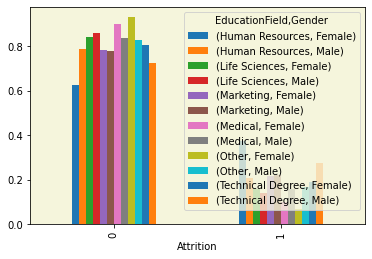

EducationField Human Resources           Life Sciences           Marketing  \
Gender                  Female      Male        Female      Male    Female   
Attrition                                                                    
0                        0.625  0.789474      0.841667  0.860656  0.782609   
1                        0.375  0.210526      0.158333  0.139344  0.217391   

EducationField           Medical               Other            \
Gender              Male  Female      Male    Female      Male   
Attrition                                                        
0               0.777778     0.9  0.839416  0.931034  0.830189   
1               0.222222     0.1  0.160584  0.068966  0.169811   

EducationField Technical Degree         
Gender                   Female   Male  
Attrition                               
0                      0.807692  0.725  
1                      0.192308  0.275  


22 >--------------------------Attrition vs EducationField vs JobInvolve

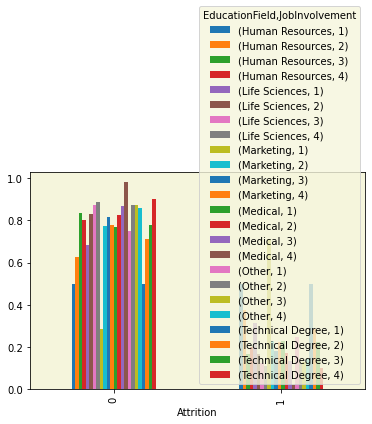

EducationField Human Resources                       Life Sciences            \
JobInvolvement               1      2         3    4             1         2   
Attrition                                                                      
0                          0.5  0.625  0.833333  0.8      0.684211  0.831081   
1                          0.5  0.375  0.166667  0.2      0.315789  0.168919   

EducationField                     Marketing            ...   Medical  \
JobInvolvement         3         4         1         2  ...         3   
Attrition                                               ...             
0               0.874302  0.887097  0.285714  0.772727  ...  0.867159   
1               0.125698  0.112903  0.714286  0.227273  ...  0.132841   

EducationField           Other                           Technical Degree  \
JobInvolvement         4     1      2        3         4                1   
Attrition                                                                   
0 

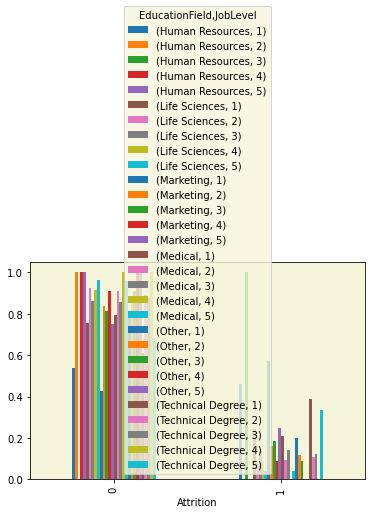

EducationField Human Resources                     Life Sciences            \
JobLevel                     1    2    3    4    5             1         2   
Attrition                                                                    
0                     0.538462  1.0  0.0  1.0  1.0      0.755459  0.925926   
1                     0.461538  0.0  1.0  0.0  0.0      0.244541  0.074074   

EducationField                                ... Other                      \
JobLevel               3         4         5  ...     1         2         3   
Attrition                                     ...                             
0               0.862069  0.916667  0.961538  ...   0.8  0.882353  0.909091   
1               0.137931  0.083333  0.038462  ...   0.2  0.117647  0.090909   

EducationField           Technical Degree                                  
JobLevel          4    5                1         2      3    4         5  
Attrition                                                    

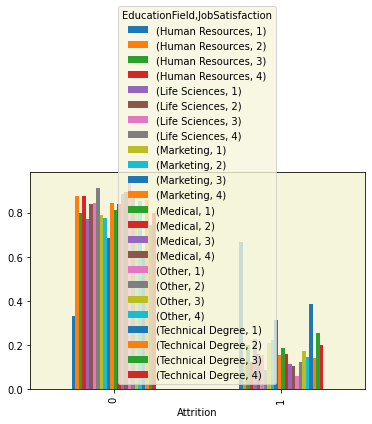

EducationField  Human Resources                    Life Sciences            \
JobSatisfaction               1      2    3      4             1         2   
Attrition                                                                    
0                      0.333333  0.875  0.8  0.875      0.769912  0.841584   
1                      0.666667  0.125  0.2  0.125      0.230088  0.158416   

EducationField                      Marketing         ...   Medical            \
JobSatisfaction         3         4         1      2  ...         3         4   
Attrition                                             ...                       
0                0.845745  0.911765  0.787879  0.775  ...  0.885135  0.895522   
1                0.154255  0.088235  0.212121  0.225  ...  0.114865  0.104478   

EducationField    Other                            Technical Degree            \
JobSatisfaction       1      2         3         4                1         2   
Attrition                                

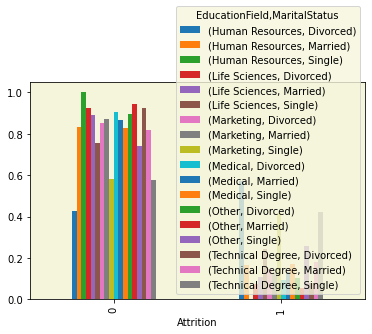

EducationField Human Resources                  Life Sciences            \
MaritalStatus         Divorced   Married Single      Divorced   Married   
Attrition                                                                 
0                     0.428571  0.833333    1.0      0.925373  0.889299   
1                     0.571429  0.166667    0.0      0.074627  0.110701   

EducationField           Marketing                      Medical            \
MaritalStatus     Single  Divorced  Married    Single  Divorced   Married   
Attrition                                                                   
0               0.756219  0.852941  0.87013  0.583333  0.906542  0.866667   
1               0.243781  0.147059  0.12987  0.416667  0.093458  0.133333   

EducationField               Other                     Technical Degree  \
MaritalStatus     Single  Divorced   Married    Single         Divorced   
Attrition                                                                 
0            

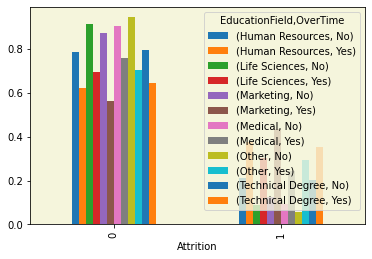

EducationField Human Resources        Life Sciences           Marketing  \
OverTime                    No    Yes            No       Yes        No   
Attrition                                                                 
0                     0.789474  0.625       0.91344  0.694611  0.873874   
1                     0.210526  0.375       0.08656  0.305389  0.126126   

EducationField           Medical               Other            \
OverTime           Yes        No       Yes        No       Yes   
Attrition                                                        
0               0.5625  0.906627  0.757576  0.945455  0.703704   
1               0.4375  0.093373  0.242424  0.054545  0.296296   

EducationField Technical Degree            
OverTime                     No       Yes  
Attrition                                  
0                      0.795918  0.647059  
1                      0.204082  0.352941  


27 >--------------------------Attrition vs EducationField vs WorkLifeBa

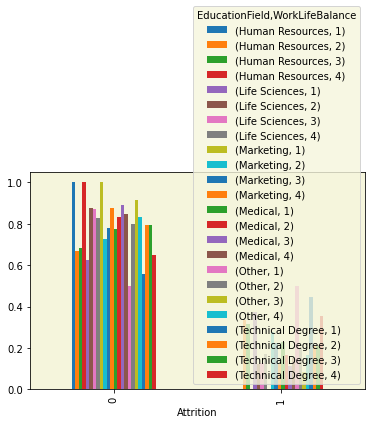

EducationField  Human Resources                          Life Sciences  \
WorkLifeBalance               1         2         3    4             1   
Attrition                                                                
0                           1.0  0.666667  0.684211  1.0         0.625   
1                           0.0  0.333333  0.315789  0.0         0.375   

EducationField                             Marketing         ...   Medical  \
WorkLifeBalance         2      3         4         1      2  ...         3   
Attrition                                                    ...             
0                0.876812  0.872  0.830189       1.0  0.725  ...  0.888889   
1                0.123188  0.128  0.169811       0.0  0.275  ...  0.111111   

EducationField            Other                          Technical Degree  \
WorkLifeBalance         4     1    2         3         4                1   
Attrition                                                                   
0      

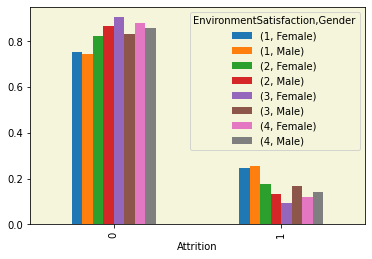

EnvironmentSatisfaction         1                  2                   3  \
Gender                     Female     Male    Female      Male    Female   
Attrition                                                                  
0                        0.752212  0.74269  0.821429  0.868571  0.904762   
1                        0.247788  0.25731  0.178571  0.131429  0.095238   

EnvironmentSatisfaction                  4            
Gender                       Male   Female      Male  
Attrition                                             
0                        0.833333  0.87931  0.856618  
1                        0.166667  0.12069  0.143382  


29 >--------------------------Attrition vs EnvironmentSatisfaction vs JobInvolvement ------------


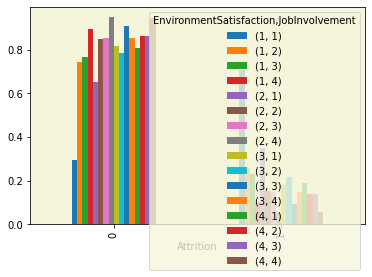

EnvironmentSatisfaction         1                                       2  \
JobInvolvement                  1         2         3         4         1   
Attrition                                                                   
0                        0.294118  0.743243  0.768293  0.896552  0.652174   
1                        0.705882  0.256757  0.231707  0.103448  0.347826   

EnvironmentSatisfaction                                   3            \
JobInvolvement              2         3         4         1         2   
Attrition                                                               
0                        0.85  0.854545  0.948718  0.818182  0.782258   
1                        0.15  0.145455  0.051282  0.181818  0.217742   

EnvironmentSatisfaction                             4                      \
JobInvolvement                  3         4         1         2         3   
Attrition                                                                   
0                

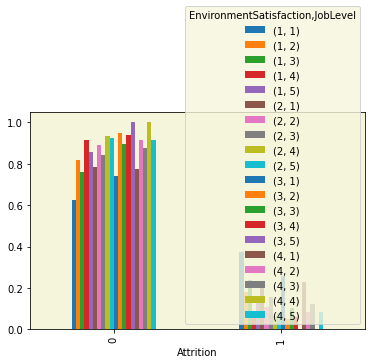

EnvironmentSatisfaction         1                                         \
JobLevel                        1         2        3         4         5   
Attrition                                                                  
0                        0.626168  0.819149  0.76087  0.913043  0.857143   
1                        0.373832  0.180851  0.23913  0.086957  0.142857   

EnvironmentSatisfaction         2                                          \
JobLevel                        1         2         3         4         5   
Attrition                                                                   
0                        0.784314  0.890756  0.842105  0.933333  0.923077   
1                        0.215686  0.109244  0.157895  0.066667  0.076923   

EnvironmentSatisfaction        3                                            4  \
JobLevel                       1         2         3         4    5         1   
Attrition                                                              

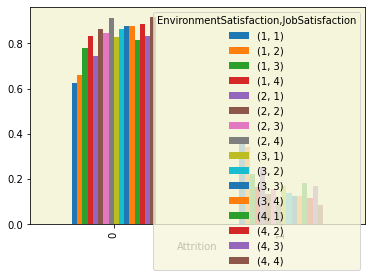

EnvironmentSatisfaction         1                                   2  \
JobSatisfaction                 1         2     3         4         1   
Attrition                                                               
0                        0.622642  0.659574  0.78  0.833333  0.745455   
1                        0.377358  0.340426  0.22  0.166667  0.254545   

EnvironmentSatisfaction                                       3            \
JobSatisfaction                 2         3         4         1         2   
Attrition                                                                   
0                        0.864407  0.845238  0.910112  0.829787  0.862069   
1                        0.135593  0.154762  0.089888  0.170213  0.137931   

EnvironmentSatisfaction                       4                                
JobSatisfaction              3      4         1         2         3         4  
Attrition                                                                      
0       

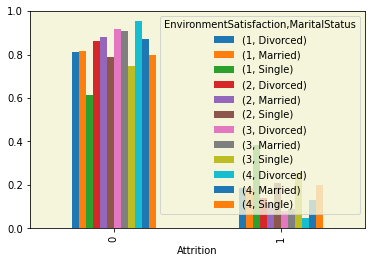

EnvironmentSatisfaction        1                             2            \
MaritalStatus           Divorced   Married    Single  Divorced   Married   
Attrition                                                                  
0                         0.8125  0.814516  0.614583  0.862069  0.881119   
1                         0.1875  0.185484  0.385417  0.137931  0.118881   

EnvironmentSatisfaction                   3                            4  \
MaritalStatus              Single  Divorced   Married    Single Divorced   
Attrition                                                                  
0                        0.790698  0.919192  0.909091  0.746269  0.95283   
1                        0.209302  0.080808  0.090909  0.253731  0.04717   

EnvironmentSatisfaction                      
MaritalStatus             Married    Single  
Attrition                                    
0                        0.870968  0.798701  
1                        0.129032  0.201299  


33 >--

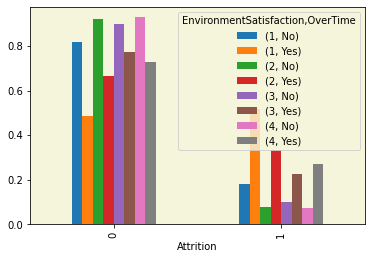

EnvironmentSatisfaction        1                  2              3            \
OverTime                      No       Yes       No       Yes   No       Yes   
Attrition                                                                      
0                        0.81982  0.483871  0.92233  0.666667  0.9  0.774436   
1                        0.18018  0.516129  0.07767  0.333333  0.1  0.225564   

EnvironmentSatisfaction         4            
OverTime                       No       Yes  
Attrition                                    
0                        0.928105  0.728571  
1                        0.071895  0.271429  


34 >--------------------------Attrition vs EnvironmentSatisfaction vs WorkLifeBalance ------------


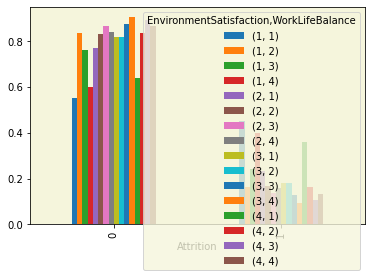

EnvironmentSatisfaction     1                                  2            \
WorkLifeBalance             1         2         3    4         1         2   
Attrition                                                                    
0                        0.55  0.835821  0.760479  0.6  0.769231  0.833333   
1                        0.45  0.164179  0.239521  0.4  0.230769  0.166667   

EnvironmentSatisfaction                         3                           \
WorkLifeBalance                 3     4         1     2         3        4   
Attrition                                                                    
0                        0.865497  0.84  0.818182  0.82  0.874101  0.90566   
1                        0.134503  0.16  0.181818  0.18  0.125899  0.09434   

EnvironmentSatisfaction     4                                
WorkLifeBalance             1         2         3         4  
Attrition                                                    
0                        0.64  0

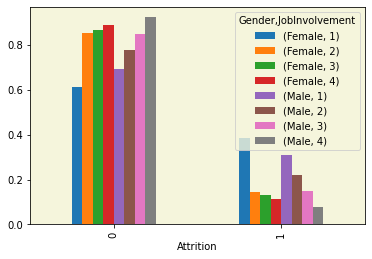

Gender            Female                                    Male            \
JobInvolvement         1         2         3         4         1         2   
Attrition                                                                    
0               0.612903  0.855346  0.866667  0.886792  0.692308  0.777778   
1               0.387097  0.144654  0.133333  0.113208  0.307692  0.222222   

Gender                              
JobInvolvement         3         4  
Attrition                           
0               0.848948  0.923077  
1               0.151052  0.076923  


36 >--------------------------Attrition vs Gender vs JobLevel ------------


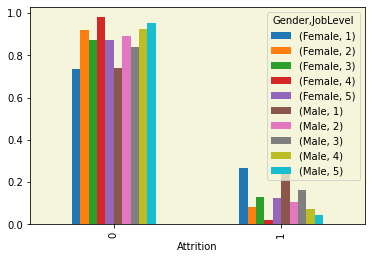

Gender       Female                                          Male           \
JobLevel          1         2        3         4      5         1        2   
Attrition                                                                    
0          0.733668  0.918182  0.87234  0.980392  0.875  0.738372  0.89172   
1          0.266332  0.081818  0.12766  0.019608  0.125  0.261628  0.10828   

Gender                                  
JobLevel         3         4         5  
Attrition                               
0          0.83871  0.927273  0.955556  
1          0.16129  0.072727  0.044444  


37 >--------------------------Attrition vs Gender vs JobSatisfaction ------------


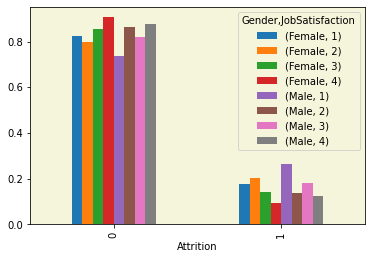

Gender             Female                                   Male            \
JobSatisfaction         1        2         3         4         1         2   
Attrition                                                                    
0                0.823529  0.79661  0.856354  0.905882  0.735294  0.864198   
1                0.176471  0.20339  0.143646  0.094118  0.264706  0.135802   

Gender                               
JobSatisfaction         3         4  
Attrition                            
0                0.819923  0.875433  
1                0.180077  0.124567  


38 >--------------------------Attrition vs Gender vs MaritalStatus ------------


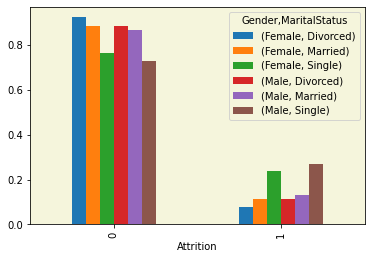

Gender           Female                          Male                   
MaritalStatus  Divorced   Married    Single  Divorced  Married    Single
Attrition                                                               
0              0.923077  0.886029  0.763819  0.885714  0.86783  0.730627
1              0.076923  0.113971  0.236181  0.114286  0.13217  0.269373


39 >--------------------------Attrition vs Gender vs OverTime ------------


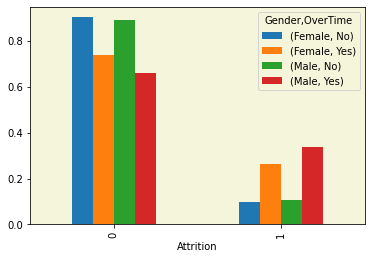

Gender       Female                Male          
OverTime         No       Yes        No       Yes
Attrition                                        
0          0.901961  0.738889  0.891641  0.661017
1          0.098039  0.261111  0.108359  0.338983


40 >--------------------------Attrition vs Gender vs WorkLifeBalance ------------


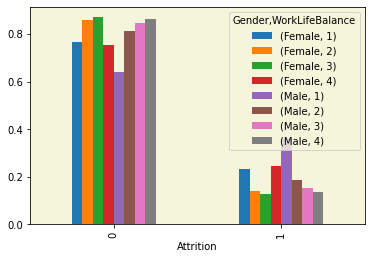

Gender             Female                                Male          \
WorkLifeBalance         1         2         3         4     1       2   
Attrition                                                               
0                0.766667  0.860294  0.871233  0.754386  0.64  0.8125   
1                0.233333  0.139706  0.128767  0.245614  0.36  0.1875   

Gender                               
WorkLifeBalance         3         4  
Attrition                            
0                0.848485  0.864583  
1                0.151515  0.135417  


41 >--------------------------Attrition vs JobInvolvement vs JobLevel ------------


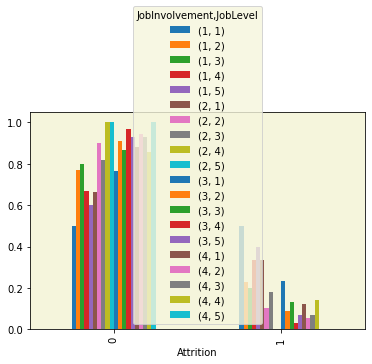

JobInvolvement    1                                       2            \
JobLevel          1         2    3         4    5         1         2   
Attrition                                                               
0               0.5  0.771429  0.8  0.666667  0.6  0.664234  0.898438   
1               0.5  0.228571  0.2  0.333333  0.4  0.335766  0.101562   

JobInvolvement                             3                                \
JobLevel               3    4    5         1         2         3         4   
Attrition                                                                    
0               0.818182  1.0  1.0  0.764151  0.911672  0.867188  0.967742   
1               0.181818  0.0  0.0  0.235849  0.088328  0.132812  0.032258   

JobInvolvement                  4                                     
JobLevel               5        1         2         3         4    5  
Attrition                                                             
0               0.930233  0.87

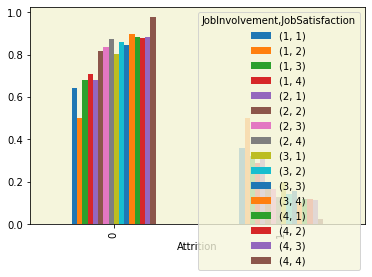

JobInvolvement          1                              2                      \
JobSatisfaction         1    2         3         4     1         2         3   
Attrition                                                                      
0                0.642857  0.5  0.678571  0.709677  0.68  0.814815  0.833333   
1                0.357143  0.5  0.321429  0.290323  0.32  0.185185  0.166667   

JobInvolvement                    3                                       4  \
JobSatisfaction         4         1         2         3         4         1   
Attrition                                                                     
0                0.873874  0.801205  0.859756  0.844106  0.898182  0.882353   
1                0.126126  0.198795  0.140244  0.155894  0.101818  0.117647   

JobInvolvement                            
JobSatisfaction     2         3        4  
Attrition                                 
0                0.88  0.883721  0.97619  
1                0.12  0.116279

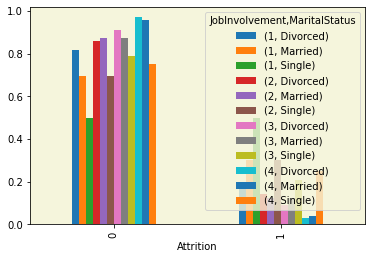

JobInvolvement         1                         2                      \
MaritalStatus   Divorced  Married Single  Divorced   Married    Single   
Attrition                                                                
0               0.818182  0.69697    0.5  0.859155  0.874286  0.697674   
1               0.181818  0.30303    0.5  0.140845  0.125714  0.302326   

JobInvolvement        3                            4                   
MaritalStatus  Divorced  Married    Single  Divorced   Married Single  
Attrition                                                              
0                  0.91  0.87468  0.790614  0.970588  0.959459   0.75  
1                  0.09  0.12532  0.209386  0.029412  0.040541   0.25  


44 >--------------------------Attrition vs JobInvolvement vs OverTime ------------


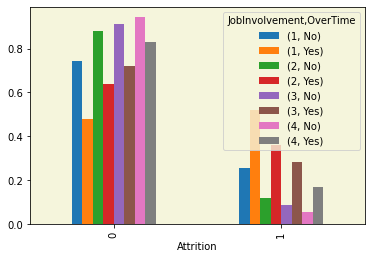

JobInvolvement         1               2                   3            \
OverTime              No   Yes        No       Yes        No       Yes   
Attrition                                                                
0               0.741379  0.48  0.877778  0.638095  0.910112  0.718367   
1               0.258621  0.52  0.122222  0.361905  0.089888  0.281633   

JobInvolvement         4            
OverTime              No       Yes  
Attrition                           
0               0.941748  0.829268  
1               0.058252  0.170732  


45 >--------------------------Attrition vs JobInvolvement vs WorkLifeBalance ------------


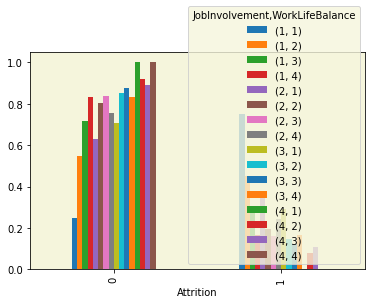

JobInvolvement      1                                   2                     \
WorkLifeBalance     1     2         3         4         1         2        3   
Attrition                                                                      
0                0.25  0.55  0.716981  0.833333  0.631579  0.804878  0.83691   
1                0.75  0.45  0.283019  0.166667  0.368421  0.195122  0.16309   

JobInvolvement                    3                                  4  \
WorkLifeBalance         4         1         2         3         4    1   
Attrition                                                                
0                0.756098  0.705882  0.853659  0.875969  0.833333  1.0   
1                0.243902  0.294118  0.146341  0.124031  0.166667  0.0   

JobInvolvement                           
WorkLifeBalance         2        3    4  
Attrition                                
0                0.918919  0.89011  1.0  
1                0.081081  0.10989  0.0  


46 >------------

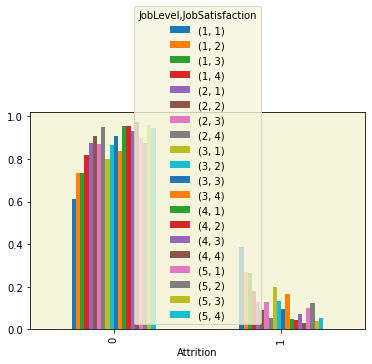

JobLevel                1                                       2            \
JobSatisfaction         1         2         3         4         1         2   
Attrition                                                                     
0                0.613208  0.731481  0.734568  0.820359  0.872549  0.907216   
1                0.386792  0.268519  0.265432  0.179641  0.127451  0.092784   

JobLevel                               3                               \
JobSatisfaction         3         4    1         2        3         4   
Attrition                                                               
0                0.871166  0.947674  0.8  0.864865  0.90625  0.835821   
1                0.128834  0.052326  0.2  0.135135  0.09375  0.164179   

JobLevel                4                                  5               \
JobSatisfaction         1         2         3         4    1      2     3   
Attrition                                                                   
0      

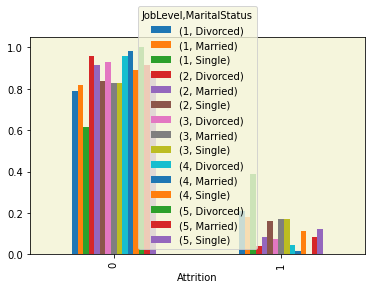

JobLevel              1                             2                      \
MaritalStatus  Divorced   Married    Single  Divorced   Married    Single   
Attrition                                                                   
0              0.788991  0.818966  0.613861  0.959016  0.916335  0.838509   
1              0.211009  0.181034  0.386139  0.040984  0.083665  0.161491   

JobLevel              3                             4                      \
MaritalStatus  Divorced   Married    Single  Divorced   Married    Single   
Attrition                                                                   
0              0.927273  0.828283  0.828125  0.956522  0.982143  0.888889   
1              0.072727  0.171717  0.171875  0.043478  0.017857  0.111111   

JobLevel             5                   
MaritalStatus Divorced   Married Single  
Attrition                                
0                  1.0  0.914286  0.875  
1                  0.0  0.085714  0.125  


48 >------------

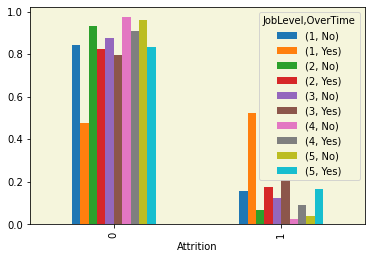

JobLevel          1                  2                   3            \
OverTime         No       Yes       No       Yes        No       Yes   
Attrition                                                              
0          0.842377  0.474359  0.93299  0.821918  0.877419  0.793651   
1          0.157623  0.525641  0.06701  0.178082  0.122581  0.206349   

JobLevel          4                   5            
OverTime         No       Yes        No       Yes  
Attrition                                          
0          0.972603  0.909091  0.960784  0.833333  
1          0.027397  0.090909  0.039216  0.166667  


49 >--------------------------Attrition vs JobLevel vs WorkLifeBalance ------------


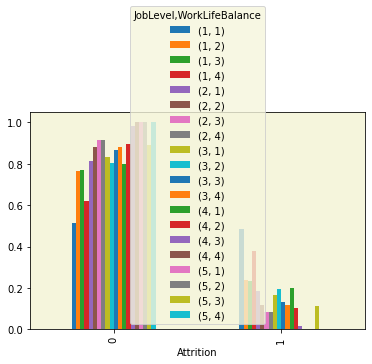

JobLevel                1                                   2            \
WorkLifeBalance         1         2         3     4         1         2   
Attrition                                                                 
0                0.514286  0.762963  0.767802  0.62  0.814815  0.881356   
1                0.485714  0.237037  0.232198  0.38  0.185185  0.118644   

JobLevel                                    3                              4  \
WorkLifeBalance         3         4         1         2         3     4    1   
Attrition                                                                      
0                0.914894  0.916667  0.833333  0.804348  0.866667  0.88  0.8   
1                0.085106  0.083333  0.166667  0.195652  0.133333  0.12  0.2   

JobLevel                                    5                      
WorkLifeBalance         2         3    4    1    2         3    4  
Attrition                                                          
0                0.

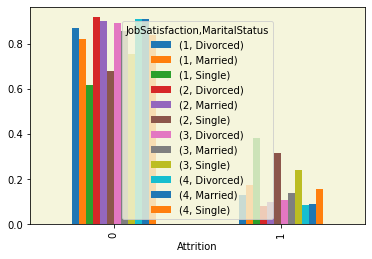

JobSatisfaction         1                             2                      \
MaritalStatus    Divorced   Married    Single  Divorced   Married    Single   
Attrition                                                                     
0                0.871429  0.823077  0.617978  0.918033  0.900763  0.681818   
1                0.128571  0.176923  0.382022  0.081967  0.099237  0.318182   

JobSatisfaction         3                             4                    
MaritalStatus    Divorced   Married    Single  Divorced Married    Single  
Attrition                                                                  
0                0.893617  0.858491  0.757353  0.911765    0.91  0.840764  
1                0.106383  0.141509  0.242647  0.088235    0.09  0.159236  


51 >--------------------------Attrition vs JobSatisfaction vs OverTime ------------


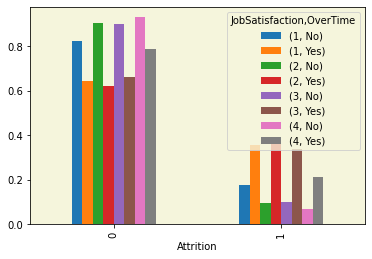

JobSatisfaction        1                   2                   3            \
OverTime              No       Yes        No       Yes        No       Yes   
Attrition                                                                    
0                0.82439  0.642857  0.905213  0.623188  0.900312  0.661157   
1                0.17561  0.357143  0.094787  0.376812  0.099688  0.338843   

JobSatisfaction         4            
OverTime               No       Yes  
Attrition                            
0                0.930599  0.788732  
1                0.069401  0.211268  


52 >--------------------------Attrition vs JobSatisfaction vs WorkLifeBalance ------------


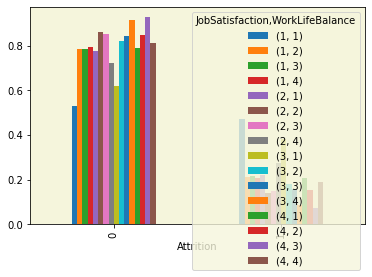

JobSatisfaction         1                                       2            \
WorkLifeBalance         1         2         3         4         1         2   
Attrition                                                                     
0                0.529412  0.786885  0.785714  0.793103  0.777778  0.862069   
1                0.470588  0.213115  0.214286  0.206897  0.222222  0.137931   

JobSatisfaction                             3                                \
WorkLifeBalance         3         4         1         2         3         4   
Attrition                                                                     
0                0.851429  0.724138  0.619048  0.821782  0.842491  0.914894   
1                0.148571  0.275862  0.380952  0.178218  0.157509  0.085106   

JobSatisfaction         4                              
WorkLifeBalance         1         2         3       4  
Attrition                                              
0                0.791667  0.846774  0.9

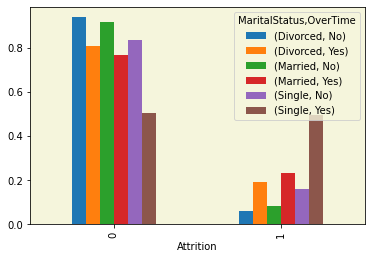

MaritalStatus  Divorced             Married              Single          
OverTime             No       Yes        No       Yes        No       Yes
Attrition                                                                
0              0.938596  0.808081  0.915811  0.768817  0.837758  0.503817
1              0.061404  0.191919  0.084189  0.231183  0.162242  0.496183


54 >--------------------------Attrition vs MaritalStatus vs WorkLifeBalance ------------


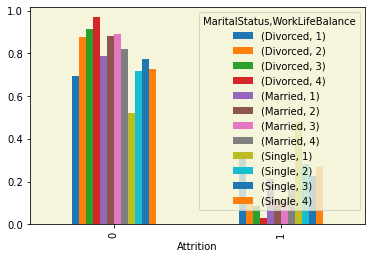

MaritalStatus    Divorced                             Married            \
WorkLifeBalance         1      2         3        4         1         2   
Attrition                                                                 
0                0.692308  0.875  0.912371  0.96875  0.785714  0.882353   
1                0.307692  0.125  0.087629  0.03125  0.214286  0.117647   

MaritalStatus                       Single                               
WorkLifeBalance         3         4      1         2        3         4  
Attrition                                                                
0                0.891358  0.821918   0.52  0.718447  0.77551  0.729167  
1                0.108642  0.178082   0.48  0.281553  0.22449  0.270833  


55 >--------------------------Attrition vs OverTime vs WorkLifeBalance ------------


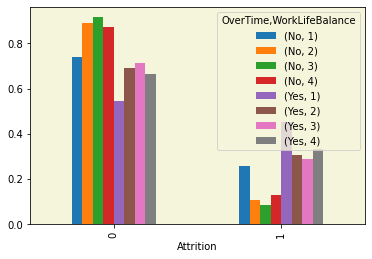

OverTime               No                                     Yes            \
WorkLifeBalance         1         2         3         4         1         2   
Attrition                                                                     
0                0.741379  0.891667  0.915493  0.871795  0.545455  0.692308   
1                0.258621  0.108333  0.084507  0.128205  0.454545  0.307692   

OverTime                             
WorkLifeBalance         3         4  
Attrition                            
0                0.712598  0.666667  
1                0.287402  0.333333  


In [ ]:
li_2 = ['BusinessTravel', 'Department', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MaritalStatus', 'OverTime',  'WorkLifeBalance']
count=1
for j in range(len(li_2)):
    for k in range(j+1, len(li_2)):
        condition = pd.crosstab(df.Attrition, columns = [df[li_2[j]],df[li_2[k]]])

        # columns
        col_1 = condition.sum(axis=0)
        col_2 = condition.div(col_1,axis=1)
        col_2.plot.bar()
        print("\n")
        print(count,">--------------------------Attrition","vs",li_2[j] , "vs", li_2[k],"------------")
        plt.show()
        print(col_2)
        count+=1

        

### Trivariate Analysis for continuous data

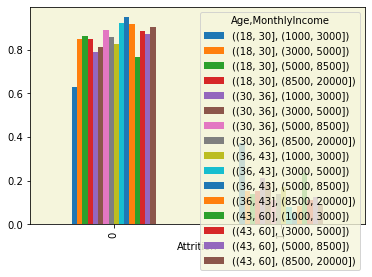

Age               (18, 30]                                          \
MonthlyIncome (1000, 3000] (3000, 5000] (5000, 8500] (8500, 20000]   
Attrition                                                            
0                 0.629834     0.848739     0.862069          0.85   
1                 0.370166     0.151261     0.137931          0.15   

Age               (30, 36]                                          \
MonthlyIncome (1000, 3000] (3000, 5000] (5000, 8500] (8500, 20000]   
Attrition                                                            
0                 0.790476     0.813084     0.889706      0.859375   
1                 0.209524     0.186916     0.110294      0.140625   

Age               (36, 43]                                          \
MonthlyIncome (1000, 3000] (3000, 5000] (5000, 8500] (8500, 20000]   
Attrition                                                            
0                 0.827586         0.92     0.948454      0.915789   
1                 

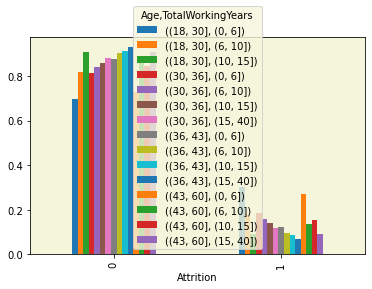

Age                (18, 30]                      (30, 36]                      \
TotalWorkingYears    (0, 6]   (6, 10]  (10, 15]    (0, 6]   (6, 10]  (10, 15]   
Attrition                                                                       
0                  0.699588  0.818182  0.909091  0.813953  0.843023  0.857143   
1                  0.300412  0.181818  0.090909  0.186047  0.156977  0.142857   

Age                         (36, 43]                                (43, 60]  \
TotalWorkingYears  (15, 40]   (0, 6]   (6, 10]  (10, 15]  (15, 40]    (0, 6]   
Attrition                                                                      
0                  0.882353    0.875  0.902256  0.914894  0.929204  0.730769   
1                  0.117647    0.125  0.097744  0.085106  0.070796  0.269231   

Age                                              
TotalWorkingYears   (6, 10]  (10, 15]  (15, 40]  
Attrition                                        
0                  0.865672  0.844444  0.90

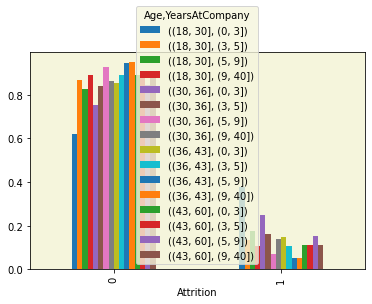

Age            (18, 30]                                (30, 36]            \
YearsAtCompany   (0, 3]    (3, 5]    (5, 9]   (9, 40]    (0, 3]    (3, 5]   
Attrition                                                                   
0                  0.62  0.866667  0.825581  0.891892  0.752212  0.839506   
1                  0.38  0.133333  0.174419  0.108108  0.247788  0.160494   

Age                                 (36, 43]                               \
YearsAtCompany    (5, 9]   (9, 40]    (0, 3]    (3, 5]    (5, 9]  (9, 40]   
Attrition                                                                   
0               0.927083  0.862069  0.853659  0.890625  0.945946  0.94898   
1               0.072917  0.137931  0.146341  0.109375  0.054054  0.05102   

Age             (43, 60]                                
YearsAtCompany    (0, 3]    (3, 5]    (5, 9]   (9, 40]  
Attrition                                               
0               0.888889  0.887324  0.847222  0.886957  


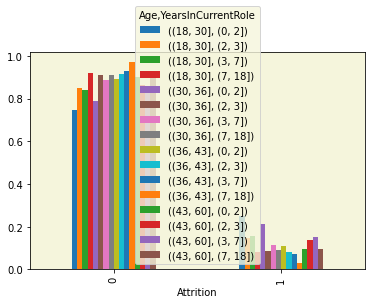

Age                 (18, 30]                              (30, 36]            \
YearsInCurrentRole    (0, 2]    (2, 3]    (3, 7] (7, 18]    (0, 2]    (2, 3]   
Attrition                                                                      
0                   0.748201  0.851064  0.842697    0.92  0.789474  0.913043   
1                   0.251799  0.148936  0.157303    0.08  0.210526  0.086957   

Age                                     (36, 43]                      \
YearsInCurrentRole    (3, 7]   (7, 18]    (0, 2]    (2, 3]    (3, 7]   
Attrition                                                              
0                   0.886957  0.910112  0.890625  0.916667  0.927835   
1                   0.113043  0.089888  0.109375  0.083333  0.072165   

Age                           (43, 60]                                
YearsInCurrentRole   (7, 18]    (0, 2]    (2, 3]    (3, 7]   (7, 18]  
Attrition                                                             
0                   0.970

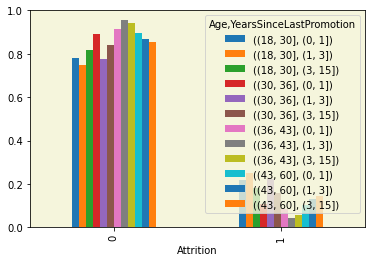

Age                      (18, 30]                   (30, 36]            \
YearsSinceLastPromotion    (0, 1] (1, 3]   (3, 15]    (0, 1]    (1, 3]   
Attrition                                                                
0                        0.782609   0.75  0.818182  0.892473  0.775862   
1                        0.217391   0.25  0.181818  0.107527  0.224138   

Age                              (36, 43]                      (43, 60]  \
YearsSinceLastPromotion (3, 15]    (0, 1]    (1, 3]   (3, 15]    (0, 1]   
Attrition                                                                 
0                          0.84  0.915493  0.954545  0.941176  0.897436   
1                          0.16  0.084507  0.045455  0.058824  0.102564   

Age                                          
YearsSinceLastPromotion    (1, 3]   (3, 15]  
Attrition                                    
0                        0.867925  0.854369  
1                        0.132075  0.145631  




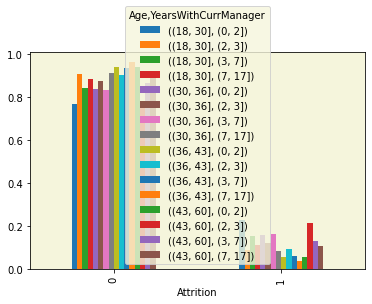

Age                   (18, 30]                              (30, 36]         \
YearsWithCurrManager    (0, 2]    (2, 3]   (3, 7]   (7, 17]   (0, 2] (2, 3]   
Attrition                                                                     
0                     0.771429  0.909091  0.84375  0.884615     0.84  0.875   
1                     0.228571  0.090909  0.15625  0.115385     0.16  0.125   

Age                                     (36, 43]                               \
YearsWithCurrManager    (3, 7] (7, 17]    (0, 2]   (2, 3]    (3, 7]   (7, 17]   
Attrition                                                                       
0                     0.834862  0.9125  0.942857  0.90625  0.935897  0.962963   
1                     0.165138  0.0875  0.057143  0.09375  0.064103  0.037037   

Age                   (43, 60]                                
YearsWithCurrManager    (0, 2]    (2, 3]    (3, 7]   (7, 17]  
Attrition                                                     
0        

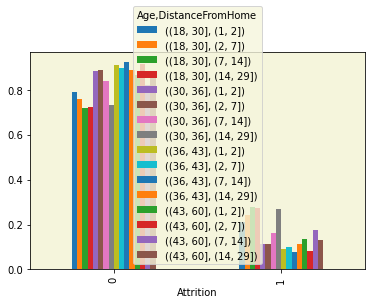

Age               (18, 30]                              (30, 36]            \
DistanceFromHome    (1, 2]    (2, 7]  (7, 14] (14, 29]    (1, 2]    (2, 7]   
Attrition                                                                    
0                 0.790698  0.758242  0.72093  0.72549  0.884615  0.888889   
1                 0.209302  0.241758  0.27907  0.27451  0.115385  0.111111   

Age                                   (36, 43]                                \
DistanceFromHome   (7, 14]  (14, 29]    (1, 2]    (2, 7]   (7, 14]  (14, 29]   
Attrition                                                                      
0                 0.838384  0.731959  0.910714  0.898551  0.922222  0.887324   
1                 0.161616  0.268041  0.089286  0.101449  0.077778  0.112676   

Age               (43, 60]                                
DistanceFromHome    (1, 2]    (2, 7]   (7, 14]  (14, 29]  
Attrition                                                 
0                 0.866667  0.9

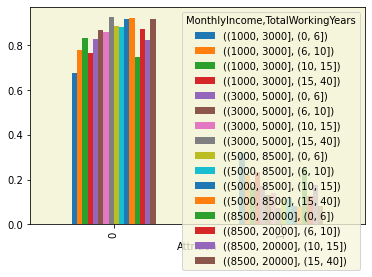

MonthlyIncome     (1000, 3000]                             (3000, 5000]  \
TotalWorkingYears       (0, 6] (6, 10]  (10, 15]  (15, 40]       (0, 6]   
Attrition                                                                 
0                     0.679012    0.78  0.833333  0.764706     0.831081   
1                     0.320988    0.22  0.166667  0.235294     0.168919   

MonthlyIncome                                   (5000, 8500]            \
TotalWorkingYears   (6, 10]  (10, 15]  (15, 40]       (0, 6]   (6, 10]   
Attrition                                                                
0                  0.868217  0.861111  0.926829     0.885714  0.884211   
1                  0.131783  0.138889  0.073171     0.114286  0.115789   

MonthlyIncome                         (8500, 20000]                      \
TotalWorkingYears  (10, 15]  (15, 40]        (0, 6]   (6, 10]  (10, 15]   
Attrition                                                                 
0                  0.917647 

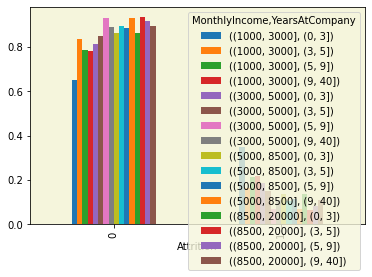

MonthlyIncome  (1000, 3000]                               (3000, 5000]  \
YearsAtCompany       (0, 3]    (3, 5]    (5, 9]   (9, 40]       (0, 3]   
Attrition                                                                
0                      0.65  0.836957  0.785714  0.782609     0.814815   
1                      0.35  0.163043  0.214286  0.217391     0.185185   

MonthlyIncome                                (5000, 8500]                   \
YearsAtCompany    (3, 5]    (5, 9]   (9, 40]       (0, 3]    (3, 5] (5, 9]   
Attrition                                                                    
0               0.851485  0.932432  0.888889     0.864407  0.895522  0.888   
1               0.148515  0.067568  0.111111     0.135593  0.104478  0.112   

MonthlyIncome            (8500, 20000]                                
YearsAtCompany   (9, 40]        (0, 3]    (3, 5]    (5, 9]   (9, 40]  
Attrition                                                             
0               0.932039 

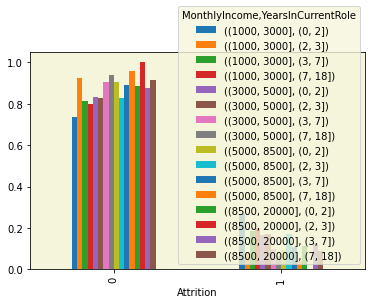

MonthlyIncome      (1000, 3000]                             (3000, 5000]  \
YearsInCurrentRole       (0, 2]    (2, 3]    (3, 7] (7, 18]       (0, 2]   
Attrition                                                                  
0                      0.734177  0.923077  0.813559     0.8     0.832117   
1                      0.265823  0.076923  0.186441     0.2     0.167883   

MonthlyIncome                                  (5000, 8500]            \
YearsInCurrentRole    (2, 3]    (3, 7] (7, 18]       (0, 2]    (2, 3]   
Attrition                                                               
0                   0.829268  0.903226  0.9375      0.90411  0.828571   
1                   0.170732  0.096774  0.0625      0.09589  0.171429   

MonthlyIncome                          (8500, 20000]                   \
YearsInCurrentRole    (3, 7]   (7, 18]        (0, 2] (2, 3]    (3, 7]   
Attrition                                                               
0                   0.889706  0.95

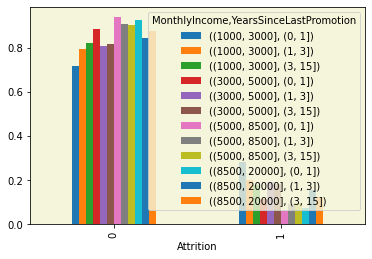

MonthlyIncome           (1000, 3000]                     (3000, 5000]  \
YearsSinceLastPromotion       (0, 1]    (1, 3]   (3, 15]       (0, 1]   
Attrition                                                               
0                            0.71875  0.797101  0.823529     0.885417   
1                            0.28125  0.202899  0.176471     0.114583   

MonthlyIncome                               (5000, 8500]                      \
YearsSinceLastPromotion    (1, 3]   (3, 15]       (0, 1]    (1, 3]   (3, 15]   
Attrition                                                                      
0                        0.807018  0.816327     0.938776  0.909091  0.902174   
1                        0.192982  0.183673     0.061224  0.090909  0.097826   

MonthlyIncome           (8500, 20000]                      
YearsSinceLastPromotion        (0, 1]    (1, 3]   (3, 15]  
Attrition                                                  
0                            0.925373  0.846154  0.87

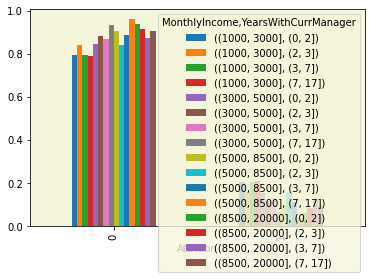

MonthlyIncome        (1000, 3000]                              (3000, 5000]  \
YearsWithCurrManager       (0, 2]    (2, 3]   (3, 7]   (7, 17]       (0, 2]   
Attrition                                                                     
0                        0.795918  0.842105  0.79661  0.789474     0.847328   
1                        0.204082  0.157895  0.20339  0.210526     0.152672   

MonthlyIncome                                     (5000, 8500]            \
YearsWithCurrManager    (2, 3]    (3, 7]  (7, 17]       (0, 2]    (2, 3]   
Attrition                                                                  
0                     0.880952  0.869565  0.93617     0.907895  0.842105   
1                     0.119048  0.130435  0.06383     0.092105  0.157895   

MonthlyIncome                            (8500, 20000]                   \
YearsWithCurrManager    (3, 7]   (7, 17]        (0, 2]    (2, 3] (3, 7]   
Attrition                                                                

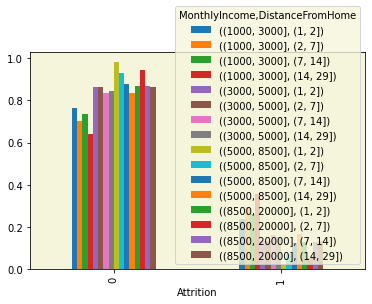

MonthlyIncome    (1000, 3000]                               (3000, 5000]  \
DistanceFromHome       (1, 2]    (2, 7]   (7, 14]  (14, 29]       (1, 2]   
Attrition                                                                  
0                    0.763636  0.704082  0.736264  0.641304     0.865385   
1                    0.236364  0.295918  0.263736  0.358696     0.134615   

MonthlyIncome                                  (5000, 8500]            \
DistanceFromHome    (2, 7]   (7, 14]  (14, 29]       (1, 2]    (2, 7]   
Attrition                                                               
0                 0.864198  0.836957  0.845238     0.980392  0.928571   
1                 0.135802  0.163043  0.154762     0.019608  0.071429   

MonthlyIncome                        (8500, 20000]                      \
DistanceFromHome   (7, 14]  (14, 29]        (1, 2]    (2, 7]   (7, 14]   
Attrition                                                                
0                 0.876543  0.8

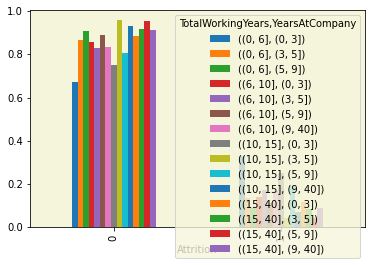

TotalWorkingYears    (0, 6]                       (6, 10]                      \
YearsAtCompany       (0, 3]    (3, 5]    (5, 9]    (0, 3]    (3, 5]    (5, 9]   
Attrition                                                                       
0                  0.672199  0.865248  0.909091  0.858696  0.827957  0.888325   
1                  0.327801  0.134752  0.090909  0.141304  0.172043  0.111675   

TotalWorkingYears           (10, 15]                                (15, 40]  \
YearsAtCompany      (9, 40]   (0, 3]    (3, 5]    (5, 9]   (9, 40]    (0, 3]   
Attrition                                                                      
0                  0.833333     0.75  0.958333  0.807692  0.929412  0.884058   
1                  0.166667     0.25  0.041667  0.192308  0.070588  0.115942   

TotalWorkingYears                                
YearsAtCompany       (3, 5]    (5, 9]   (9, 40]  
Attrition                                        
0                  0.916667  0.956522  0.91

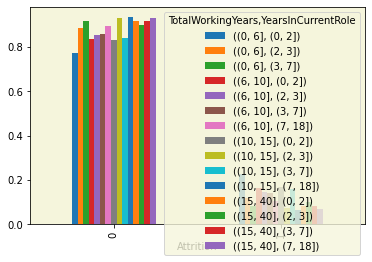

TotalWorkingYears     (0, 6]                       (6, 10]            \
YearsInCurrentRole    (0, 2]    (2, 3]    (3, 7]    (0, 2]    (2, 3]   
Attrition                                                              
0                   0.771429  0.883333  0.916667  0.837037  0.853659   
1                   0.228571  0.116667  0.083333  0.162963  0.146341   

TotalWorkingYears                       (10, 15]                      \
YearsInCurrentRole    (3, 7]   (7, 18]    (0, 2]    (2, 3]    (3, 7]   
Attrition                                                              
0                   0.857868  0.894737  0.833333  0.928571  0.842105   
1                   0.142132  0.105263  0.166667  0.071429  0.157895   

TotalWorkingYears             (15, 40]                             
YearsInCurrentRole   (7, 18]    (0, 2] (2, 3]    (3, 7]   (7, 18]  
Attrition                                                          
0                   0.934211  0.916667    0.9  0.917526  0.930769  
1     

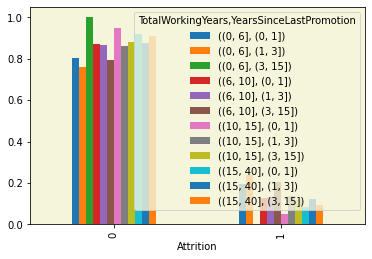

TotalWorkingYears         (0, 6]                 (6, 10]                      \
YearsSinceLastPromotion   (0, 1]  (1, 3] (3, 15]  (0, 1]    (1, 3]   (3, 15]   
Attrition                                                                      
0                        0.80303  0.7625     1.0   0.872  0.867925  0.796117   
1                        0.19697  0.2375     0.0   0.128  0.132075  0.203883   

TotalWorkingYears        (10, 15]                      (15, 40]            \
YearsSinceLastPromotion    (0, 1]    (1, 3]   (3, 15]    (0, 1]    (1, 3]   
Attrition                                                                   
0                        0.948718  0.862069  0.882353  0.918033  0.877551   
1                        0.051282  0.137931  0.117647  0.081967  0.122449   

TotalWorkingYears                  
YearsSinceLastPromotion   (3, 15]  
Attrition                          
0                        0.908451  
1                        0.091549  




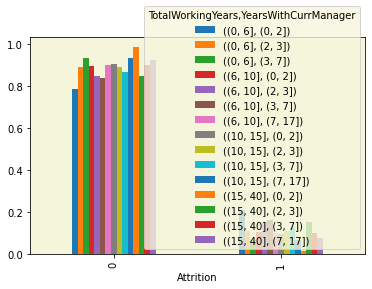

TotalWorkingYears      (0, 6]                       (6, 10]            \
YearsWithCurrManager   (0, 2]    (2, 3]    (3, 7]    (0, 2]    (2, 3]   
Attrition                                                               
0                     0.78744  0.890909  0.931818  0.894309  0.846154   
1                     0.21256  0.109091  0.068182  0.105691  0.153846   

TotalWorkingYears                         (10, 15]                      \
YearsWithCurrManager    (3, 7]   (7, 17]    (0, 2]    (2, 3]    (3, 7]   
Attrition                                                                
0                     0.835165  0.898551  0.903226  0.888889  0.867647   
1                     0.164835  0.101449  0.096774  0.111111  0.132353   

TotalWorkingYears               (15, 40]                             
YearsWithCurrManager   (7, 17]    (0, 2]    (2, 3] (3, 7]   (7, 17]  
Attrition                                                            
0                     0.932203  0.983051  0.846154   

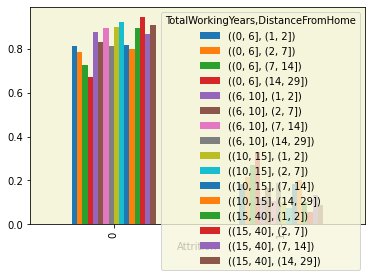

TotalWorkingYears    (0, 6]                               (6, 10]            \
DistanceFromHome     (1, 2]    (2, 7]   (7, 14] (14, 29]   (1, 2]    (2, 7]   
Attrition                                                                     
0                  0.815385  0.784946  0.728972     0.67  0.87931  0.833333   
1                  0.184615  0.215054  0.271028     0.33  0.12069  0.166667   

TotalWorkingYears                     (10, 15]                               \
DistanceFromHome    (7, 14]  (14, 29]   (1, 2]    (2, 7]   (7, 14] (14, 29]   
Attrition                                                                     
0                  0.895161  0.813008      0.9  0.924528  0.815789      0.8   
1                  0.104839  0.186992      0.1  0.075472  0.184211      0.2   

TotalWorkingYears  (15, 40]                                
DistanceFromHome     (1, 2]    (2, 7]   (7, 14]  (14, 29]  
Attrition                                                  
0                  0.896552 

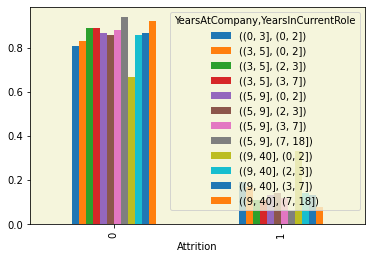

YearsAtCompany        (0, 3]    (3, 5]                       (5, 9]            \
YearsInCurrentRole    (0, 2]    (0, 2]   (2, 3]    (3, 7]    (0, 2]    (2, 3]   
Attrition                                                                       
0                   0.808429  0.830508  0.88785  0.888889  0.868421  0.857143   
1                   0.191571  0.169492  0.11215  0.111111  0.131579  0.142857   

YearsAtCompany                         (9, 40]                                
YearsInCurrentRole    (3, 7] (7, 18]    (0, 2]    (2, 3]    (3, 7]   (7, 18]  
Attrition                                                                     
0                   0.878378  0.9375  0.666667  0.857143  0.866667  0.922078  
1                   0.121622  0.0625  0.333333  0.142857  0.133333  0.077922  




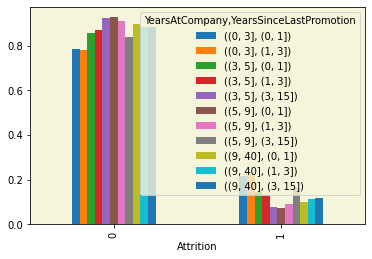

YearsAtCompany             (0, 3]           (3, 5]                      \
YearsSinceLastPromotion    (0, 1]    (1, 3] (0, 1]    (1, 3]   (3, 15]   
Attrition                                                                
0                        0.784091  0.780702  0.856  0.869565  0.923077   
1                        0.215909  0.219298  0.144  0.130435  0.076923   

YearsAtCompany             (5, 9]                       (9, 40]            \
YearsSinceLastPromotion    (0, 1]    (1, 3]   (3, 15]    (0, 1]    (1, 3]   
Attrition                                                                   
0                        0.926316  0.909091  0.836538  0.897959  0.884615   
1                        0.073684  0.090909  0.163462  0.102041  0.115385   

YearsAtCompany                     
YearsSinceLastPromotion   (3, 15]  
Attrition                          
0                        0.882353  
1                        0.117647  




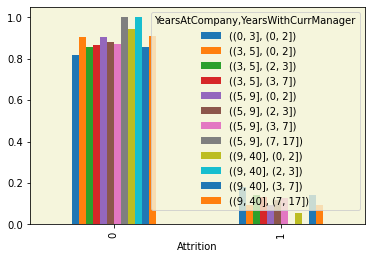

YearsAtCompany         (0, 3]    (3, 5]                        (5, 9]         \
YearsWithCurrManager   (0, 2]    (0, 2]    (2, 3]    (3, 7]    (0, 2] (2, 3]   
Attrition                                                                      
0                     0.81746  0.906542  0.858407  0.865672  0.906977   0.88   
1                     0.18254  0.093458  0.141593  0.134328  0.093023   0.12   

YearsAtCompany                           (9, 40]                            
YearsWithCurrManager    (3, 7] (7, 17]    (0, 2] (2, 3]    (3, 7]  (7, 17]  
Attrition                                                                   
0                     0.870813     1.0  0.944444    1.0  0.857143  0.90795  
1                     0.129187     0.0  0.055556    0.0  0.142857  0.09205  




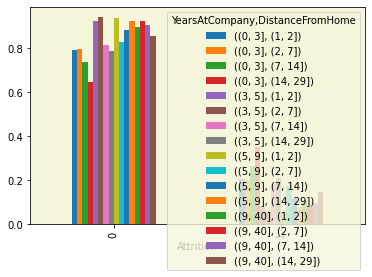

YearsAtCompany      (0, 3]                                  (3, 5]            \
DistanceFromHome    (1, 2]    (2, 7]   (7, 14]  (14, 29]    (1, 2]    (2, 7]   
Attrition                                                                      
0                 0.794118  0.798077  0.736264  0.647059  0.923077  0.941176   
1                 0.205882  0.201923  0.263736  0.352941  0.076923  0.058824   

YearsAtCompany                          (5, 9]                               \
DistanceFromHome   (7, 14]  (14, 29]    (1, 2]   (2, 7]   (7, 14]  (14, 29]   
Attrition                                                                     
0                 0.813953  0.788732  0.938776  0.82716  0.883117  0.922078   
1                 0.186047  0.211268  0.061224  0.17284  0.116883  0.077922   

YearsAtCompany     (9, 40]                                
DistanceFromHome    (1, 2]    (2, 7]   (7, 14]  (14, 29]  
Attrition                                                 
0                 0.895833

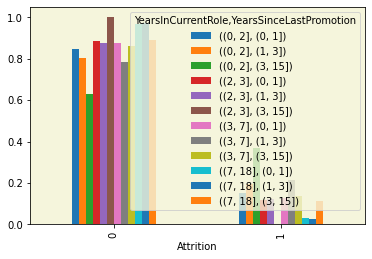

YearsInCurrentRole      (0, 2]                        (2, 3]                 \
YearsSinceLastPromotion (0, 1]    (1, 3]   (3, 15]    (0, 1] (1, 3] (3, 15]   
Attrition                                                                     
0                        0.848  0.804688  0.631579  0.883333  0.875     1.0   
1                        0.152  0.195312  0.368421  0.116667  0.125     0.0   

YearsInCurrentRole         (3, 7]                       (7, 18]         \
YearsSinceLastPromotion    (0, 1]    (1, 3]   (3, 15]    (0, 1] (1, 3]   
Attrition                                                                
0                        0.873874  0.785714  0.861789  0.967742  0.975   
1                        0.126126  0.214286  0.138211  0.032258  0.025   

YearsInCurrentRole                 
YearsSinceLastPromotion   (3, 15]  
Attrition                          
0                        0.888889  
1                        0.111111  




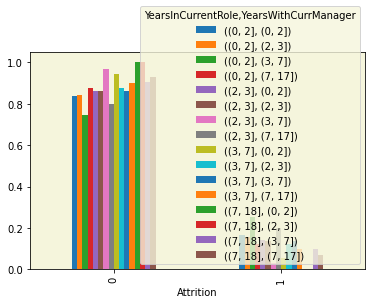

YearsInCurrentRole      (0, 2]                             (2, 3]            \
YearsWithCurrManager    (0, 2]    (2, 3]    (3, 7] (7, 17] (0, 2]    (2, 3]   
Attrition                                                                     
0                     0.835125  0.843137  0.745098   0.875   0.86  0.863636   
1                     0.164875  0.156863  0.254902   0.125   0.14  0.136364   

YearsInCurrentRole                        (3, 7]                             \
YearsWithCurrManager    (3, 7] (7, 17]    (0, 2] (2, 3]    (3, 7]   (7, 17]   
Attrition                                                                     
0                     0.966667     0.8  0.945455  0.875  0.862069  0.902439   
1                     0.033333     0.2  0.054545  0.125  0.137931  0.097561   

YearsInCurrentRole   (7, 18]                             
YearsWithCurrManager  (0, 2] (2, 3]    (3, 7]   (7, 17]  
Attrition                                                
0                        1.0    1.

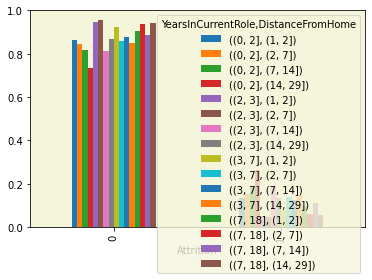

YearsInCurrentRole    (0, 2]                                  (2, 3]  \
DistanceFromHome      (1, 2]    (2, 7]   (7, 14]  (14, 29]    (1, 2]   
Attrition                                                              
0                   0.864407  0.845455  0.816327  0.735849  0.947368   
1                   0.135593  0.154545  0.183673  0.264151  0.052632   

YearsInCurrentRole                                  (3, 7]                    \
DistanceFromHome      (2, 7]   (7, 14]  (14, 29]    (1, 2]    (2, 7] (7, 14]   
Attrition                                                                      
0                   0.954545  0.810811  0.866667  0.921875  0.858586   0.875   
1                   0.045455  0.189189  0.133333  0.078125  0.141414   0.125   

YearsInCurrentRole             (7, 18]                                
DistanceFromHome    (14, 29]    (1, 2]    (2, 7]   (7, 14]  (14, 29]  
Attrition                                                             
0                   0.849

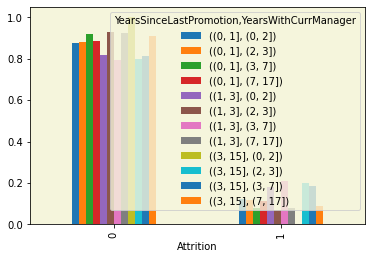

YearsSinceLastPromotion    (0, 1]                               (1, 3]  \
YearsWithCurrManager       (0, 2] (2, 3]    (3, 7]   (7, 17]    (0, 2]   
Attrition                                                                
0                        0.875912   0.88  0.920792  0.885714  0.818182   
1                        0.124088   0.12  0.079208  0.114286  0.181818   

YearsSinceLastPromotion                               (3, 15]         \
YearsWithCurrManager       (2, 3]    (3, 7]   (7, 17]  (0, 2] (2, 3]   
Attrition                                                              
0                        0.928571  0.791667  0.923077     1.0    0.8   
1                        0.071429  0.208333  0.076923     0.0    0.2   

YearsSinceLastPromotion                      
YearsWithCurrManager       (3, 7]   (7, 17]  
Attrition                                    
0                        0.813433  0.910959  
1                        0.186567  0.089041  




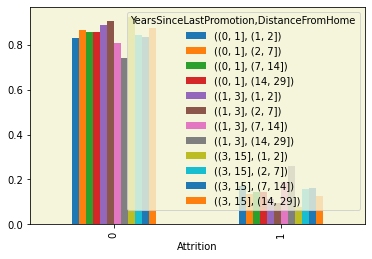

YearsSinceLastPromotion    (0, 1]                                  (1, 3]  \
DistanceFromHome           (1, 2]    (2, 7]   (7, 14]  (14, 29]    (1, 2]   
Attrition                                                                   
0                        0.829787  0.863014  0.857143  0.855556  0.888889   
1                        0.170213  0.136986  0.142857  0.144444  0.111111   

YearsSinceLastPromotion                                (3, 15]            \
DistanceFromHome           (2, 7]   (7, 14] (14, 29]    (1, 2]    (2, 7]   
Attrition                                                                  
0                        0.903846  0.809524     0.74  0.921569  0.841463   
1                        0.096154  0.190476     0.26  0.078431  0.158537   

YearsSinceLastPromotion                      
DistanceFromHome          (7, 14]  (14, 29]  
Attrition                                    
0                        0.835821  0.873418  
1                        0.164179  0.126582  




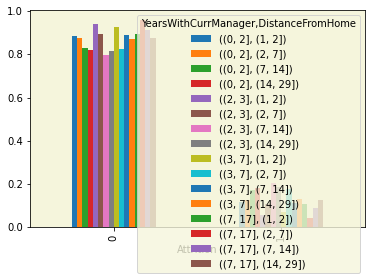

YearsWithCurrManager    (0, 2]                                  (2, 3]  \
DistanceFromHome        (1, 2]    (2, 7]   (7, 14]  (14, 29]    (1, 2]   
Attrition                                                                
0                     0.885246  0.876289  0.829787  0.819048  0.941176   
1                     0.114754  0.123711  0.170213  0.180952  0.058824   

YearsWithCurrManager                                  (3, 7]            \
DistanceFromHome        (2, 7]   (7, 14]  (14, 29]    (1, 2]    (2, 7]   
Attrition                                                                
0                     0.894737  0.794872  0.814815  0.927273  0.822222   
1                     0.105263  0.205128  0.185185  0.072727  0.177778   

YearsWithCurrManager                      (7, 17]                               
DistanceFromHome      (7, 14]  (14, 29]    (1, 2]    (2, 7]   (7, 14] (14, 29]  
Attrition                                                                       
0              

In [ ]:
list_cont = [new_Age,
            new_MonthlyIncome,
            new_TotalWorkingYear,
            new_YearsAtCompany,
            new_YearsInCurrentRole,
            new_YearsSinceLastPromotion,
            new_YearsWithCurrManager,
            new_DistanceFromHome]

for j in range(len(list_cont)):
    for k in range(j+1, len(list_cont)):
        condition = pd.crosstab(df.Attrition, columns = [list_cont[j],list_cont[k]])

        # columns
        col_1 = condition.sum(axis=0)
        col_2 = condition.div(col_1,axis=1)
        col_2.plot.bar()
        print("\n")
        plt.show()
        print(col_2)
        count+=1
          

### Age VS Attrition VS Joblevel

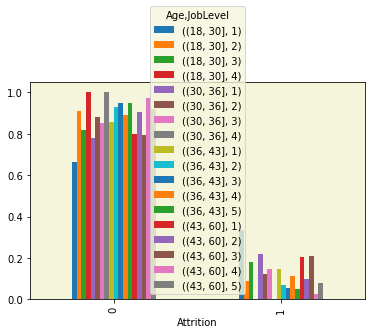

Age        (18, 30]                          (30, 36]                      \
JobLevel          1        2         3    4         1         2         3   
Attrition                                                                   
0          0.663934  0.90991  0.818182  1.0  0.778523  0.879581  0.852941   
1          0.336066  0.09009  0.181818  0.0  0.221477  0.120419  0.147059   

Age             (36, 43]                                     (43, 60]  \
JobLevel     4         1         2         3         4     5        1   
Attrition                                                               
0          1.0  0.855422  0.928058  0.946429  0.888889  0.95  0.79661   
1          0.0  0.144578  0.071942  0.053571  0.111111  0.05  0.20339   

Age                                                
JobLevel          2         3         4         5  
Attrition                                          
0          0.903226  0.791667  0.972973  0.918367  
1          0.096774  0.208333  0.027027 

In [ ]:
# AGE VS ATTRITION VS JOBLEVEL
new_Age = pd.cut(df["Age"],bins=[18,30,36,43,60] )
condition = pd.crosstab(df.Attrition, columns = [new_Age, df.JobLevel])

# columns
col_1 = condition.sum(axis=0)
col_2 = condition.div(col_1,axis=1)
col_2.plot.bar()
plt.show()
print(col_2)

# Age is highly correlated with JobLevel




### Age VS Attrition VS MonthlyIncome

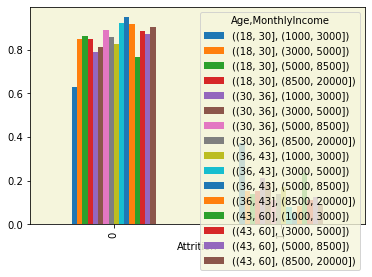

Age               (18, 30]                                          \
MonthlyIncome (1000, 3000] (3000, 5000] (5000, 8500] (8500, 20000]   
Attrition                                                            
0                 0.629834     0.848739     0.862069          0.85   
1                 0.370166     0.151261     0.137931          0.15   

Age               (30, 36]                                          \
MonthlyIncome (1000, 3000] (3000, 5000] (5000, 8500] (8500, 20000]   
Attrition                                                            
0                 0.790476     0.813084     0.889706      0.859375   
1                 0.209524     0.186916     0.110294      0.140625   

Age               (36, 43]                                          \
MonthlyIncome (1000, 3000] (3000, 5000] (5000, 8500] (8500, 20000]   
Attrition                                                            
0                 0.827586         0.92     0.948454      0.915789   
1                 

In [ ]:
# AGE VS ATTRITION VS MonthlyIncome
new_Age = pd.cut(df["Age"],bins=[18,30,36,43,60] )
new_MonthlyIncome = pd.cut(df["MonthlyIncome"],bins=[1000,3000,5000,8500,20000] )

condition = pd.crosstab(df.Attrition, columns = [new_Age, new_MonthlyIncome])

# columns
col_1 = condition.sum(axis=0)
col_2 = condition.div(col_1,axis=1)
col_2.plot.bar()
plt.show()
print(col_2)

# Age is highly correlated with MonthlyIncome


### Age VS Attrition VS YearsAtCompany

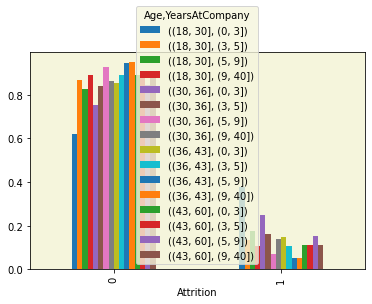

Age            (18, 30]                                (30, 36]            \
YearsAtCompany   (0, 3]    (3, 5]    (5, 9]   (9, 40]    (0, 3]    (3, 5]   
Attrition                                                                   
0                  0.62  0.866667  0.825581  0.891892  0.752212  0.839506   
1                  0.38  0.133333  0.174419  0.108108  0.247788  0.160494   

Age                                 (36, 43]                               \
YearsAtCompany    (5, 9]   (9, 40]    (0, 3]    (3, 5]    (5, 9]  (9, 40]   
Attrition                                                                   
0               0.927083  0.862069  0.853659  0.890625  0.945946  0.94898   
1               0.072917  0.137931  0.146341  0.109375  0.054054  0.05102   

Age             (43, 60]                                
YearsAtCompany    (0, 3]    (3, 5]    (5, 9]   (9, 40]  
Attrition                                               
0               0.888889  0.887324  0.847222  0.886957  


In [ ]:
# AGE VS ATTRITION VS YearsAtCompany
new_Age = pd.cut(df["Age"],bins=[18,30,36,43,60] )
new_YearsAtCompany = pd.cut(df["YearsAtCompany"],bins=[0,3,5,9,40] )
condition = pd.crosstab(df.Attrition, columns = [new_Age, new_YearsAtCompany])

# columns
col_1 = condition.sum(axis=0)
col_2 = condition.div(col_1,axis=1)
col_2.plot.bar()
plt.show()
print(col_2)


### Age vs attrition vs TotalWorkingYears

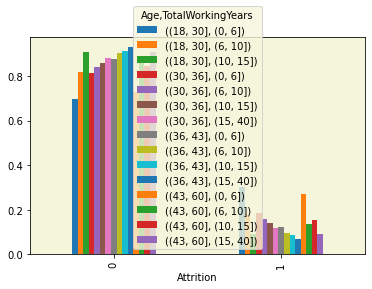

Age                (18, 30]                      (30, 36]                      \
TotalWorkingYears    (0, 6]   (6, 10]  (10, 15]    (0, 6]   (6, 10]  (10, 15]   
Attrition                                                                       
0                  0.699588  0.818182  0.909091  0.813953  0.843023  0.857143   
1                  0.300412  0.181818  0.090909  0.186047  0.156977  0.142857   

Age                         (36, 43]                                (43, 60]  \
TotalWorkingYears  (15, 40]   (0, 6]   (6, 10]  (10, 15]  (15, 40]    (0, 6]   
Attrition                                                                      
0                  0.882353    0.875  0.902256  0.914894  0.929204  0.730769   
1                  0.117647    0.125  0.097744  0.085106  0.070796  0.269231   

Age                                              
TotalWorkingYears   (6, 10]  (10, 15]  (15, 40]  
Attrition                                        
0                  0.865672  0.844444  0.90

In [ ]:
condition = pd.crosstab(df.Attrition, columns = [new_Age,new_TotalWorkingYear])
col_1 = condition.sum(axis=0)
col_2 = condition.div(col_1, axis = 1)
col_2.plot.bar()
plt.show()
print(col_2)

### JobLevel vs  MonthlyIncome

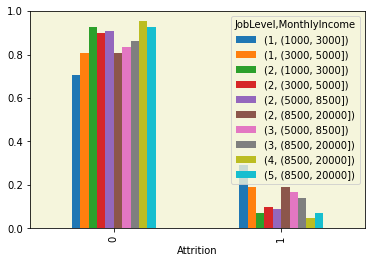

JobLevel                 1                         2               \
MonthlyIncome (1000, 3000] (3000, 5000] (1000, 3000] (3000, 5000]   
Attrition                                                           
0                 0.706037     0.808642     0.928571     0.901042   
1                 0.293963     0.191358     0.071429     0.098958   

JobLevel                                            3                \
MonthlyIncome (5000, 8500] (8500, 20000] (5000, 8500] (8500, 20000]   
Attrition                                                             
0                 0.910596      0.807692     0.833333      0.860759   
1                 0.089404      0.192308     0.166667      0.139241   

JobLevel                  4             5  
MonthlyIncome (8500, 20000] (8500, 20000]  
Attrition                                  
0                   0.95283      0.927536  
1                   0.04717      0.072464  


In [ ]:
condition = pd.crosstab(df.Attrition, columns = [df.JobLevel,new_MonthlyIncome])
col_1 = condition.sum(axis=0)
col_2 = condition.div(col_1, axis = 1)
col_2.plot.bar()
plt.show()
print(col_2)

### JobLevel vs TotalWorkingYear

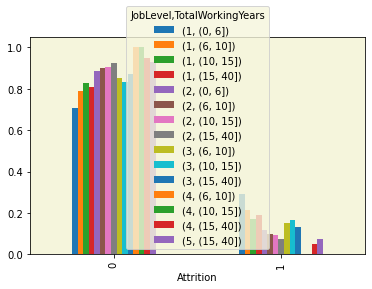

JobLevel                  1                                       2            \
TotalWorkingYears    (0, 6]   (6, 10]  (10, 15]  (15, 40]    (0, 6]   (6, 10]   
Attrition                                                                       
0                  0.706422  0.787097  0.827586  0.809524  0.883495  0.901235   
1                  0.293578  0.212903  0.172414  0.190476  0.116505  0.098765   

JobLevel                                    3                           4  \
TotalWorkingYears  (10, 15]  (15, 40] (6, 10]  (10, 15]  (15, 40] (6, 10]   
Attrition                                                                   
0                  0.906542  0.925926    0.85  0.833333  0.869048     1.0   
1                  0.093458  0.074074    0.15  0.166667  0.130952     0.0   

JobLevel                                     5  
TotalWorkingYears (10, 15]  (15, 40]  (15, 40]  
Attrition                                       
0                      1.0  0.950495  0.927536  
1           

In [ ]:
condition = pd.crosstab(df.Attrition, columns = [df.JobLevel,new_TotalWorkingYear])
col_1 = condition.sum(axis=0)
col_2 = condition.div(col_1, axis = 1)
col_2.plot.bar()
plt.show()
print(col_2)

### Joblevel vs YearsAtCompany

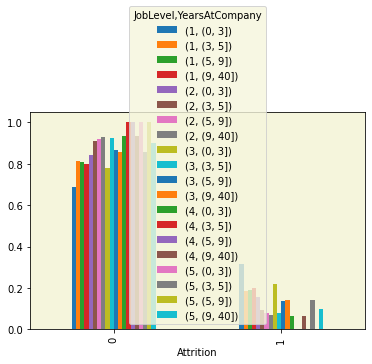

JobLevel               1                                    2            \
YearsAtCompany    (0, 3]   (3, 5]    (5, 9] (9, 40]    (0, 3]    (3, 5]   
Attrition                                                                 
0               0.686047  0.81295  0.809524     0.8  0.842593  0.908333   
1               0.313953  0.18705  0.190476     0.2  0.157407  0.091667   

JobLevel                                  3                                \
YearsAtCompany    (5, 9]   (9, 40]   (0, 3]    (3, 5]    (5, 9]   (9, 40]   
Attrition                                                                   
0               0.919753  0.931298  0.78125  0.923077  0.864407  0.857143   
1               0.080247  0.068702  0.21875  0.076923  0.135593  0.142857   

JobLevel               4                              5                   \
YearsAtCompany    (0, 3] (3, 5] (5, 9]   (9, 40] (0, 3]    (3, 5] (5, 9]   
Attrition                                                                  
0         

In [ ]:
condition = pd.crosstab(df.Attrition, columns = [df.JobLevel,new_YearsAtCompany])
col_1 = condition.sum(axis=0)
col_2 = condition.div(col_1, axis = 1)
col_2.plot.bar()
plt.show()
print(col_2)

### Job level vs YearsWithCurrManager

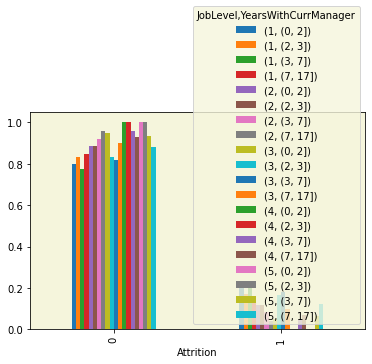

JobLevel                     1                                       2  \
YearsWithCurrManager    (0, 2]    (2, 3]    (3, 7]   (7, 17]    (0, 2]   
Attrition                                                                
0                     0.799065  0.830508  0.776596  0.846154  0.884058   
1                     0.200935  0.169492  0.223404  0.153846  0.115942   

JobLevel                                                 3            \
YearsWithCurrManager    (2, 3]    (3, 7] (7, 17]    (0, 2]    (2, 3]   
Attrition                                                              
0                     0.883333  0.918129    0.96  0.947368  0.833333   
1                     0.116667  0.081871    0.04  0.052632  0.166667   

JobLevel                                    4                             \
YearsWithCurrManager    (3, 7] (7, 17] (0, 2] (2, 3]    (3, 7]   (7, 17]   
Attrition                                                                  
0                     0.816901     0.9  

In [ ]:
condition = pd.crosstab(df.Attrition, columns = [df.JobLevel,new_YearsWithCurrManager])
col_1 = condition.sum(axis=0)
col_2 = condition.div(col_1, axis = 1)
col_2.plot.bar()
plt.show()
print(col_2)

### YearsWithCurrManager VS TotalWorkingYear

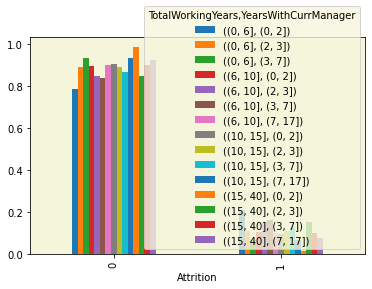

TotalWorkingYears      (0, 6]                       (6, 10]            \
YearsWithCurrManager   (0, 2]    (2, 3]    (3, 7]    (0, 2]    (2, 3]   
Attrition                                                               
0                     0.78744  0.890909  0.931818  0.894309  0.846154   
1                     0.21256  0.109091  0.068182  0.105691  0.153846   

TotalWorkingYears                         (10, 15]                      \
YearsWithCurrManager    (3, 7]   (7, 17]    (0, 2]    (2, 3]    (3, 7]   
Attrition                                                                
0                     0.835165  0.898551  0.903226  0.888889  0.867647   
1                     0.164835  0.101449  0.096774  0.111111  0.132353   

TotalWorkingYears               (15, 40]                             
YearsWithCurrManager   (7, 17]    (0, 2]    (2, 3] (3, 7]   (7, 17]  
Attrition                                                            
0                     0.932203  0.983051  0.846154   

In [ ]:
condition = pd.crosstab(df.Attrition, columns = [new_TotalWorkingYear,new_YearsWithCurrManager])
col_1 = condition.sum(axis=0)
col_2 = condition.div(col_1, axis = 1)
col_2.plot.bar()
plt.show()
print(col_2)

### YearsWithCurrManager VS YearsInCurrentRole

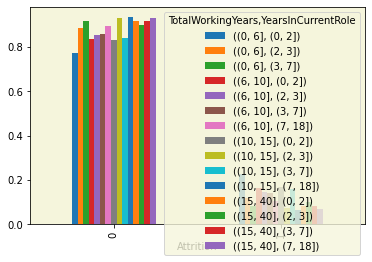

TotalWorkingYears     (0, 6]                       (6, 10]            \
YearsInCurrentRole    (0, 2]    (2, 3]    (3, 7]    (0, 2]    (2, 3]   
Attrition                                                              
0                   0.771429  0.883333  0.916667  0.837037  0.853659   
1                   0.228571  0.116667  0.083333  0.162963  0.146341   

TotalWorkingYears                       (10, 15]                      \
YearsInCurrentRole    (3, 7]   (7, 18]    (0, 2]    (2, 3]    (3, 7]   
Attrition                                                              
0                   0.857868  0.894737  0.833333  0.928571  0.842105   
1                   0.142132  0.105263  0.166667  0.071429  0.157895   

TotalWorkingYears             (15, 40]                             
YearsInCurrentRole   (7, 18]    (0, 2] (2, 3]    (3, 7]   (7, 18]  
Attrition                                                          
0                   0.934211  0.916667    0.9  0.917526  0.930769  
1     

In [ ]:
condition = pd.crosstab(df.Attrition, columns = [new_TotalWorkingYear,new_YearsInCurrentRole])
col_1 = condition.sum(axis=0)
col_2 = condition.div(col_1, axis = 1)
col_2.plot.bar()
plt.show()
print(col_2)

### YearsWithCurrManager VS YearsSinceLastPromotion

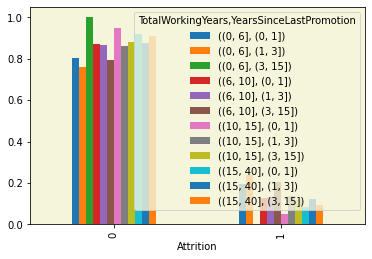

TotalWorkingYears         (0, 6]                 (6, 10]                      \
YearsSinceLastPromotion   (0, 1]  (1, 3] (3, 15]  (0, 1]    (1, 3]   (3, 15]   
Attrition                                                                      
0                        0.80303  0.7625     1.0   0.872  0.867925  0.796117   
1                        0.19697  0.2375     0.0   0.128  0.132075  0.203883   

TotalWorkingYears        (10, 15]                      (15, 40]            \
YearsSinceLastPromotion    (0, 1]    (1, 3]   (3, 15]    (0, 1]    (1, 3]   
Attrition                                                                   
0                        0.948718  0.862069  0.882353  0.918033  0.877551   
1                        0.051282  0.137931  0.117647  0.081967  0.122449   

TotalWorkingYears                  
YearsSinceLastPromotion   (3, 15]  
Attrition                          
0                        0.908451  
1                        0.091549  


In [ ]:
condition = pd.crosstab(df.Attrition, columns = [new_TotalWorkingYear,new_YearsSinceLastPromotion])
col_1 = condition.sum(axis=0)
col_2 = condition.div(col_1, axis = 1)
col_2.plot.bar()
plt.show()
print(col_2)

### TotalWorkingYear vs YearsAtCompany

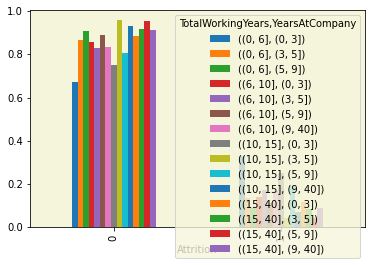

TotalWorkingYears    (0, 6]                       (6, 10]                      \
YearsAtCompany       (0, 3]    (3, 5]    (5, 9]    (0, 3]    (3, 5]    (5, 9]   
Attrition                                                                       
0                  0.672199  0.865248  0.909091  0.858696  0.827957  0.888325   
1                  0.327801  0.134752  0.090909  0.141304  0.172043  0.111675   

TotalWorkingYears           (10, 15]                                (15, 40]  \
YearsAtCompany      (9, 40]   (0, 3]    (3, 5]    (5, 9]   (9, 40]    (0, 3]   
Attrition                                                                      
0                  0.833333     0.75  0.958333  0.807692  0.929412  0.884058   
1                  0.166667     0.25  0.041667  0.192308  0.070588  0.115942   

TotalWorkingYears                                
YearsAtCompany       (3, 5]    (5, 9]   (9, 40]  
Attrition                                        
0                  0.916667  0.956522  0.91

In [ ]:
condition = pd.crosstab(df.Attrition, columns = [new_TotalWorkingYear,new_YearsAtCompany])
col_1 = condition.sum(axis=0)
col_2 = condition.div(col_1, axis = 1)
col_2.plot.bar()
plt.show()
print(col_2)

### Environment Satisfaction with continuous data

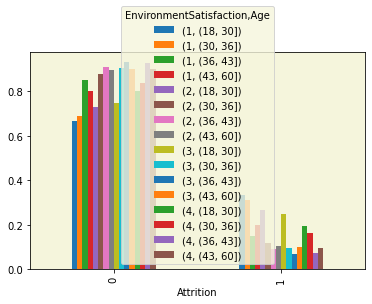

EnvironmentSatisfaction         1                                     2  \
Age                      (18, 30]  (30, 36] (36, 43] (43, 60]  (18, 30]   
Attrition                                                                 
0                        0.666667  0.689189     0.85      0.8  0.731343   
1                        0.333333  0.310811     0.15      0.2  0.268657   

EnvironmentSatisfaction                                      3           \
Age                      (30, 36]  (36, 43]  (43, 60] (18, 30] (30, 36]   
Attrition                                                                 
0                        0.879121  0.910448  0.896552     0.75    0.904   
1                        0.120879  0.089552  0.103448     0.25    0.096   

EnvironmentSatisfaction                            4                      \
Age                      (36, 43] (43, 60]  (18, 30]  (30, 36]  (36, 43]   
Attrition                                                                  
0                   

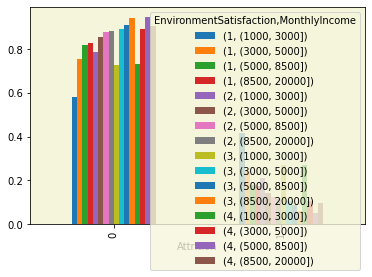

EnvironmentSatisfaction            1                                          \
MonthlyIncome           (1000, 3000] (3000, 5000] (5000, 8500] (8500, 20000]   
Attrition                                                                      
0                           0.583333     0.757143     0.820896      0.826667   
1                           0.416667     0.242857     0.179104      0.173333   

EnvironmentSatisfaction            2                                          \
MonthlyIncome           (1000, 3000] (3000, 5000] (5000, 8500] (8500, 20000]   
Attrition                                                                      
0                           0.786667     0.857143     0.876543      0.885246   
1                           0.213333     0.142857     0.123457      0.114754   

EnvironmentSatisfaction            3                                          \
MonthlyIncome           (1000, 3000] (3000, 5000] (5000, 8500] (8500, 20000]   
Attrition                             

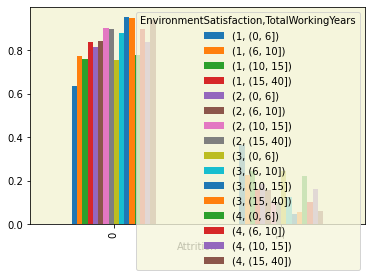

EnvironmentSatisfaction         1                                       2  \
TotalWorkingYears          (0, 6]   (6, 10]  (10, 15]  (15, 40]    (0, 6]   
Attrition                                                                   
0                        0.636364  0.775281  0.757576  0.837838  0.815789   
1                        0.363636  0.224719  0.242424  0.162162  0.184211   

EnvironmentSatisfaction                                      3            \
TotalWorkingYears         (6, 10] (10, 15]  (15, 40]    (0, 6]   (6, 10]   
Attrition                                                                  
0                        0.842593      0.9  0.898305  0.755396  0.876812   
1                        0.157407      0.1  0.101695  0.244604  0.123188   

EnvironmentSatisfaction                             4                      \
TotalWorkingYears        (10, 15]  (15, 40]    (0, 6]   (6, 10]  (10, 15]   
Attrition                                                                   
0 

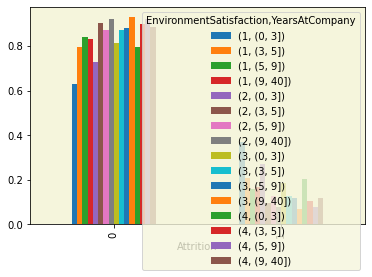

EnvironmentSatisfaction      1                                      2  \
YearsAtCompany          (0, 3]    (3, 5]    (5, 9]   (9, 40]   (0, 3]   
Attrition                                                               
0                         0.63  0.793651  0.840909  0.830986  0.72973   
1                         0.37  0.206349  0.159091  0.169014  0.27027   

EnvironmentSatisfaction                                       3           \
YearsAtCompany             (3, 5]    (5, 9]   (9, 40]    (0, 3]   (3, 5]   
Attrition                                                                  
0                        0.903846  0.873239  0.923077  0.814516  0.87234   
1                        0.096154  0.126761  0.076923  0.185484  0.12766   

EnvironmentSatisfaction                             4                     \
YearsAtCompany             (5, 9]   (9, 40]    (0, 3]    (3, 5]   (5, 9]   
Attrition                                                                  
0                        

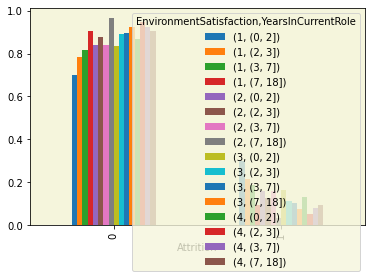

EnvironmentSatisfaction         1                                    2         \
YearsInCurrentRole         (0, 2]    (2, 3]    (3, 7]   (7, 18] (0, 2] (2, 3]   
Attrition                                                                       
0                        0.701031  0.785714  0.814286  0.904762   0.84  0.875   
1                        0.298969  0.214286  0.185714  0.095238   0.16  0.125   

EnvironmentSatisfaction                             3                      \
YearsInCurrentRole         (3, 7]   (7, 18]    (0, 2]    (2, 3]    (3, 7]   
Attrition                                                                   
0                        0.839506  0.964912  0.835938  0.888889  0.894737   
1                        0.160494  0.035088  0.164062  0.111111  0.105263   

EnvironmentSatisfaction                   4                                
YearsInCurrentRole        (7, 18]    (0, 2]    (2, 3]    (3, 7]   (7, 18]  
Attrition                                               

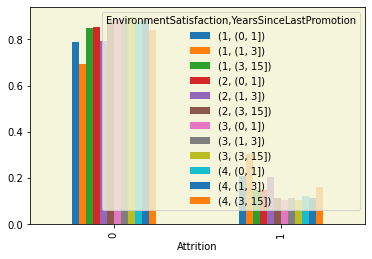

EnvironmentSatisfaction         1                             2            \
YearsSinceLastPromotion    (0, 1]    (1, 3]   (3, 15]    (0, 1]    (1, 3]   
Attrition                                                                   
0                        0.789474  0.695652  0.849057  0.853333  0.794118   
1                        0.210526  0.304348  0.150943  0.146667  0.205882   

EnvironmentSatisfaction                   3                          4  \
YearsSinceLastPromotion   (3, 15]    (0, 1]    (1, 3]   (3, 15] (0, 1]   
Attrition                                                                
0                        0.885714  0.893805  0.887097  0.895238  0.875   
1                        0.114286  0.106195  0.112903  0.104762  0.125   

EnvironmentSatisfaction                     
YearsSinceLastPromotion    (1, 3]  (3, 15]  
Attrition                                   
0                        0.884058  0.83871  
1                        0.115942  0.16129  


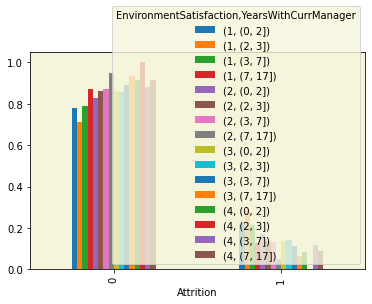

EnvironmentSatisfaction         1                                       2  \
YearsWithCurrManager       (0, 2]    (2, 3]    (3, 7]   (7, 17]    (0, 2]   
Attrition                                                                   
0                        0.777778  0.714286  0.786885  0.872727  0.828947   
1                        0.222222  0.285714  0.213115  0.127273  0.171053   

EnvironmentSatisfaction                                    3            \
YearsWithCurrManager       (2, 3]    (3, 7]   (7, 17] (0, 2]    (2, 3]   
Attrition                                                                
0                        0.862069  0.869565  0.949153  0.864  0.857143   
1                        0.137931  0.130435  0.050847  0.136  0.142857   

EnvironmentSatisfaction                             4                           
YearsWithCurrManager       (3, 7]   (7, 17]    (0, 2] (2, 3]    (3, 7] (7, 17]  
Attrition                                                                       


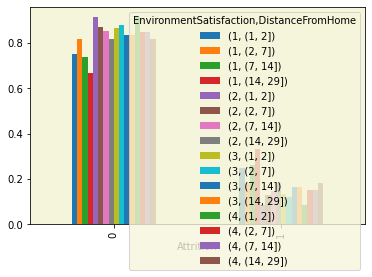

EnvironmentSatisfaction      1                                       2  \
DistanceFromHome        (1, 2]    (2, 7]   (7, 14]  (14, 29]    (1, 2]   
Attrition                                                                
0                         0.75  0.816901  0.737705  0.666667  0.914286   
1                         0.25  0.183099  0.262295  0.333333  0.085714   

EnvironmentSatisfaction                                       3            \
DistanceFromHome           (2, 7]   (7, 14]  (14, 29]    (1, 2]    (2, 7]   
Attrition                                                                   
0                        0.869565  0.855072  0.816901  0.865672  0.881818   
1                        0.130435  0.144928  0.183099  0.134328  0.118182   

EnvironmentSatisfaction                             4                    \
DistanceFromHome          (7, 14]  (14, 29]    (1, 2]    (2, 7] (7, 14]   
Attrition                                                                 
0                 

In [ ]:
list_cont = [new_Age,
            new_MonthlyIncome,
            new_TotalWorkingYear,
            new_YearsAtCompany,
            new_YearsInCurrentRole,
            new_YearsSinceLastPromotion,
            new_YearsWithCurrManager,
            new_DistanceFromHome]

for j in range(len(list_cont)):
  condition = pd.crosstab(df.Attrition, columns = [df['EnvironmentSatisfaction'],list_cont[j]])

  # columns
  col_1 = condition.sum(axis=0)
  col_2 = condition.div(col_1,axis=1)
  col_2.plot.bar()
  # print("\n EnvironmentSatisfaction VS", list_cont[j])
  plt.show()
  print(col_2)


### Overtime with continous data

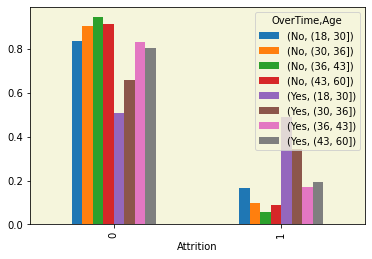

OverTime         No                                     Yes            \
Age        (18, 30]  (30, 36]  (36, 43]  (43, 60]  (18, 30]  (30, 36]   
Attrition                                                               
0          0.835766  0.904605  0.943723  0.912134  0.509615  0.657407   
1          0.164234  0.095395  0.056277  0.087866  0.490385  0.342593   

OverTime                       
Age        (36, 43]  (43, 60]  
Attrition                      
0          0.829787  0.805556  
1          0.170213  0.194444  


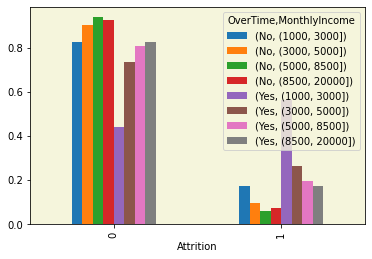

OverTime                No                                          \
MonthlyIncome (1000, 3000] (3000, 5000] (5000, 8500] (8500, 20000]   
Attrition                                                            
0                 0.825623     0.901141     0.937008      0.925781   
1                 0.174377     0.098859     0.062992      0.074219   

OverTime               Yes                                          
MonthlyIncome (1000, 3000] (3000, 5000] (5000, 8500] (8500, 20000]  
Attrition                                                           
0                 0.438596     0.736264     0.805556      0.825243  
1                 0.561404     0.263736     0.194444      0.174757  


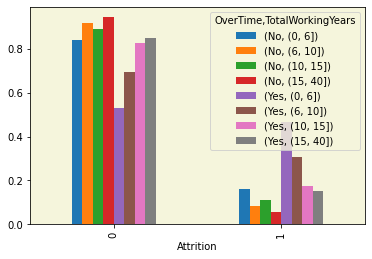

OverTime                 No                                     Yes            \
TotalWorkingYears    (0, 6]   (6, 10]  (10, 15]  (15, 40]    (0, 6]   (6, 10]   
Attrition                                                                       
0                  0.838816  0.917614  0.889655  0.942857  0.531746  0.692308   
1                  0.161184  0.082386  0.110345  0.057143  0.468254  0.307692   

OverTime                               
TotalWorkingYears  (10, 15]  (15, 40]  
Attrition                              
0                  0.826087  0.846847  
1                  0.173913  0.153153  


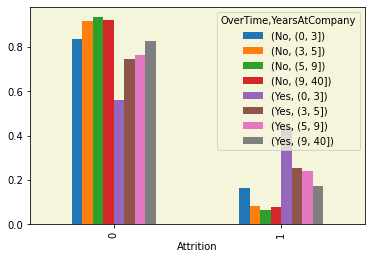

OverTime              No                                     Yes            \
YearsAtCompany    (0, 3]    (3, 5]    (5, 9]   (9, 40]    (0, 3]    (3, 5]   
Attrition                                                                    
0               0.834459  0.917808  0.933333  0.921933  0.561538  0.747126   
1               0.165541  0.082192  0.066667  0.078067  0.438462  0.252874   

OverTime                            
YearsAtCompany    (5, 9]   (9, 40]  
Attrition                           
0               0.761364  0.824742  
1               0.238636  0.175258  


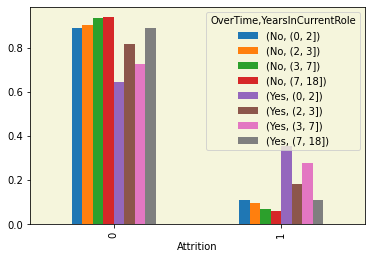

OverTime                  No                                     Yes  \
YearsInCurrentRole    (0, 2]    (2, 3]    (3, 7]   (7, 18]    (0, 2]   
Attrition                                                              
0                   0.889632  0.901961  0.931973  0.937173  0.646154   
1                   0.110368  0.098039  0.068027  0.062827  0.353846   

OverTime                                         
YearsInCurrentRole    (2, 3]   (3, 7]   (7, 18]  
Attrition                                        
0                   0.818182  0.72381  0.888889  
1                   0.181818  0.27619  0.111111  


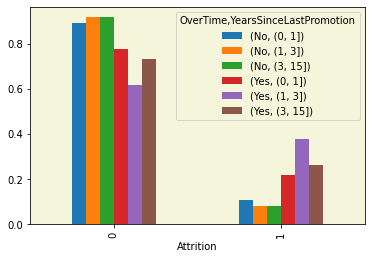

OverTime                      No                           Yes            \
YearsSinceLastPromotion   (0, 1]    (1, 3]   (3, 15]    (0, 1]    (1, 3]   
Attrition                                                                  
0                        0.89313  0.918919  0.918803  0.778947  0.619048   
1                        0.10687  0.081081  0.081197  0.221053  0.380952   

OverTime                           
YearsSinceLastPromotion   (3, 15]  
Attrition                          
0                        0.735632  
1                        0.264368  


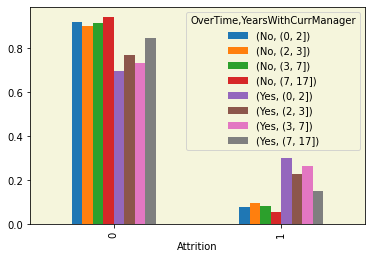

OverTime                    No                                    Yes  \
YearsWithCurrManager    (0, 2]    (2, 3]   (3, 7]   (7, 17]    (0, 2]   
Attrition                                                               
0                     0.919192  0.902913  0.91791  0.941463  0.699187   
1                     0.080808  0.097087  0.08209  0.058537  0.300813   

OverTime                                            
YearsWithCurrManager    (2, 3]    (3, 7]   (7, 17]  
Attrition                                           
0                     0.769231  0.735849  0.848485  
1                     0.230769  0.264151  0.151515  


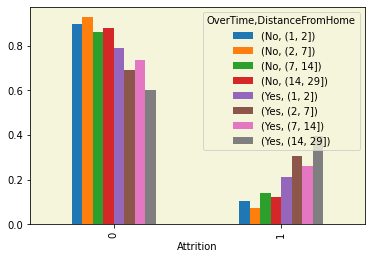

OverTime                No                                     Yes            \
DistanceFromHome    (1, 2]    (2, 7]   (7, 14]  (14, 29]    (1, 2]    (2, 7]   
Attrition                                                                      
0                 0.896104  0.927711  0.861224  0.878543  0.789474  0.691589   
1                 0.103896  0.072289  0.138776  0.121457  0.210526  0.308411   

OverTime                              
DistanceFromHome   (7, 14]  (14, 29]  
Attrition                             
0                 0.736842  0.601852  
1                 0.263158  0.398148  


In [ ]:
list_cont = [new_Age,
            new_MonthlyIncome,
            new_TotalWorkingYear,
            new_YearsAtCompany,
            new_YearsInCurrentRole,
            new_YearsSinceLastPromotion,
            new_YearsWithCurrManager,
            new_DistanceFromHome]

for j in range(len(list_cont)):
  condition = pd.crosstab(df.Attrition, columns = [df['OverTime'],list_cont[j]])

  # columns
  col_1 = condition.sum(axis=0)
  col_2 = condition.div(col_1,axis=1)
  col_2.plot.bar()
  # print("\n EnvironmentSatisfaction VS", list_cont[j])
  plt.show()
  print(col_2)


# 9.Analysis of Report


#### Bivariate Analysis 

1.Under our analysis, employee in age group 18 to 30 cause more attrition.

2.Under our analysis, employee with salary in between 1000 to 3000  shows high attrition rate at 28%
        
3.Employee with totalworkingyears in between 0 to 6 shows higher attrition rate at 25%
        
4.Employee with YearsAtCompany at 0 to 3 shows higher attrition at 25%.
        
5.Under our analysis, employee with YearsInCurrentRole is 0 to 2 shows attrtion rate at 18%
        
6.Under our analysis, years since last promotion with 1 to 3 shows higher attrition rate which is 17%.
        
7.Under our analysis, it is seen that the employee whose distance from home is more than 7 and less than or equal to 14 shows higher attrition rate at 17%.

    
8>Under our analysis, employee who Travel_frequently causes more attrition at 24% as compared to travel_rarely and non-travel.
    
9>Under our analysis R&D causes less attrition at 13% in data.
    
10>Under our analysis human resources and technical degree causes more attrition at 25%
    
11>Under our analysis the Enviornment Satisfaction_1 shows more attrition rate at 25%.
    
12> Male employees , under our analysis show higher attrition rate as compared to female.
    
13>Under our analysis the Job involvement with grade 1 causes more attrition at 33%
    
14>Under our analysis the job level_1 result in higher attrition rate at 26%
    
15>Under our analysis job satisfaction with grade 1 shows higher attrition rate at 23%
    
16> Under our analysis, employee who do overtime shows higher attrition rate at 30%
    
17> Employee with grade 1 work life balance , under our analysis shows higher attrition rate.





#### Trivariate Analysis

1>  The employee who are in sales and hr  department travel frequntly cause attrition at 36%

2>  overtime-work_life_balance_1 - 45%

3> jobsatisfaction_1 vs worklifebalance - 47%

4> job_satisfactin_1_2_3 vs overtime - 36

5> job_satisfaction_1_2 for single - 35

6> JobLevel_1 vs WorkLifeBalance_1 - 48

7> job_lv_1  vs overtime - 52

8> EnvironmentSatisfaction_1 vs OverTime - 52

9> EnvironmentSatisfaction vs JobInvolvement - 70

10> EducationField_Human Resources vs 
JobSatisfaction_1 - 66%

11> EducationField_Human resources vs JobLevel_1 - 46

12> EducationField_Marketing vs JobInv_1 - 71%

13> Under our analysis, employee in HR and job_inv_1 
shows 33% attrition rate.

14>  Under our analysis, employee in HR and job_lvl_1 shows 30% attrition rate.

15> Under our analysis, employee does overtime in sales department shows 37% atttrition rate.

